# EDA credit data analysis

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.  
This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

<a href="#1.-applications-dataFrame">applications dataFrame</a>  
<a href="#2.-Find-missing-value-Threshold">Find missing value Threshold</a>  
<a href="#3.-Clearing-data">Clearing data</a>  
<a href="#4.-categorical-columns-treatment">categorical columns treatment</a>  
<a href="#5.-Plot-for-categorical-columns-analysis">Plot for categorical columns analysis</a>  
<a href="#6.-Observation-for-categorical-columns">Observation for categorical columns</a>  
<a href="#7.-Numerical-columns-treatment">Numerical columns treatment</a>  
<a href="#8.-Plot-for-numerical-columns-analysis">Plot for numerical columns analysis</a>  
<a href="#9.-Observation-for-numerical-columns">Observation for numerical columns</a>  
<a href="#10.-Checking-imbalance-Target">Checking imbalance Targets</a>  
<a href="#11.-Univariate-analysis">Univariate analysis</a>  
<a href="#12.-Bivariate-analysis">Bivariate analysis</a>  
<a href="#13.-Multivariate-Analysis">Multivariate Analysis</a>  
<a href="#14.-previous_application-data">previous_application data</a>  
<a href="#15.-Merging-data">Merging-data</a>  
<a href="#16.-Analysis-on-merge-data">Analysis on merge data</a>  


**Importing requried modules**

In [2]:
# importing requried modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


**Importing dataFrames**

In [3]:
applications = pd.read_csv("../Credit_EDA_CaseStudy_Vedanti_DS_C46/Credit_EDA_Case_Study_datasets/application_data.csv")
#pre_applications = pd.read_csv("../Credit_EDA_CaseStudy_Vedanti_DS_C46/Credit_EDA_Case_Study_datasets/previous_application.csv")

#set max columns to 122 
pd.set_option("display.max_columns", 122)


## 1. applications dataFrame

**Understanding  data structure for applications dataFrame**

In [9]:
#check shape of dataFrame 
print(applications.shape) 

# head to check few data from applications dataFrame
applications.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# check each data type and null values for applications dataFrame
applications.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
# Describe of applications dataFrame 
# apply function to supress scientific notation from each column's statistics
applications.describe().apply(lambda col: col.apply('{0:.2f}'.format))


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

## 2. Find missing value Threshold

In [62]:
pd.set_option('display.max_rows', None)

# Missing values percentages in applications dataframe
app_row, col = applications.shape
null_count = applications.isnull().sum()
null_percentage = round((applications.isnull().sum()/app_row)*100,2)
null_display = pd.DataFrame({"Null percentage": null_percentage, "Null count": null_count})
print(null_display.shape)
null_display.sort_values(by = "Null percentage", ascending=False)


(122, 2)


,Null percentage,Null count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


## 3. Clearing data

In [63]:
# clear columns missing data > 40 %
# column name to be deleted 
col_to_del = null_display[null_display["Null percentage"] > 40].index.to_list()
print("No of column to be deleted:", len(col_to_del))
print("Column's label:" , col_to_del)
applications.drop(columns = col_to_del, axis=1, inplace=True)


No of column to be deleted: 49
Column's label: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MO

In [8]:
print(applications.shape)
applications.head()

(307511, 73)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# after deletion of few columns finding columns who's null values <35 and >1 
app_row, col = applications.shape
null_count = applications.isnull().sum()
null_percentage = round((applications.isnull().sum()/app_row)*100,2)
dtype = applications.dtypes

null_display = pd.DataFrame({"Null percentage": null_percentage, "Null count": null_count, "Data type": applications.dtypes})
print("applications datFrame Shape after removing maximum null values occurrance  {}".format( applications.shape))
print("All null columns :{0}".format(null_display.shape))
null_display.sort_values(by = "Null percentage", ascending=False)
null_below_35 = null_display[(null_display["Null percentage"] < 35)]
print(null_below_35.shape)


print("Below columns can be impute")
print("Null columns with < 35  :{0}".format(null_below_35.shape))

null_below_35.sort_values(by="Null percentage", ascending = False)


applications datFrame Shape after removing maximum null values occurrance  (307511, 73)
All null columns :(73, 3)
(73, 3)
Below columns can be impute
Null columns with < 35  :(73, 3)


,Null percentage,Null count,Data type
OCCUPATION_TYPE,31.35,96391,object
EXT_SOURCE_3,19.83,60965,float64
AMT_REQ_CREDIT_BUREAU_YEAR,13.50,41519,float64
AMT_REQ_CREDIT_BUREAU_QRT,13.50,41519,float64
AMT_REQ_CREDIT_BUREAU_MON,13.50,41519,float64
AMT_REQ_CREDIT_BUREAU_WEEK,13.50,41519,float64
AMT_REQ_CREDIT_BUREAU_DAY,13.50,41519,float64
AMT_REQ_CREDIT_BUREAU_HOUR,13.50,41519,float64
NAME_TYPE_SUITE,0.42,1292,object
OBS_30_CNT_SOCIAL_CIRCLE,0.33,1021,float64


## 4. categorical columns treatment 

In [65]:
# WE CAN CONVERT DATATYPE TO CATEGORICAL IF NUMBER OF UNIQUE VALUES <=3 
unique_count = applications.nunique()
categorical_less_3 = unique_count[unique_count<=3].index.tolist()
print("No {0} column found ", len(categorical_less_3))
for each_col in categorical_less_3:
    #print("Column name:", each_col, "Dtype:" , applications[each_col].dtype)
    if applications[each_col].dtype in ["int64", "float64"]:
        applications[each_col] = applications[each_col].astype(object)
# print(applications.info())
# applications.head()

# observing unique values in each Catogorical column those values <3
for each_col in categorical_less_3:
    print("********************************")
    print("Column Name:{}".format(each_col))
    print(applications[each_col].unique())
    
    
# observing unique values in each Catogorical column dtypes object except categorical_less_3 data

categorical_above_3 = [each for each in applications.select_dtypes("object").columns.tolist() if each not in categorical_less_3]
print(categorical_above_3)
print(len(categorical_above_3))
categorical_above_3_dataset = applications[categorical_above_3]
categorical_above_3_dataset.describe()

categorical_above_3_dataset.isnull().sum()



No {0} column found  39
********************************
Column Name:TARGET
[1 0]
********************************
Column Name:NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
********************************
Column Name:CODE_GENDER
['M' 'F' 'XNA']
********************************
Column Name:FLAG_OWN_CAR
['N' 'Y']
********************************
Column Name:FLAG_OWN_REALTY
['Y' 'N']
********************************
Column Name:FLAG_MOBIL
[1 0]
********************************
Column Name:FLAG_EMP_PHONE
[1 0]
********************************
Column Name:FLAG_WORK_PHONE
[0 1]
********************************
Column Name:FLAG_CONT_MOBILE
[1 0]
********************************
Column Name:FLAG_PHONE
[1 0]
********************************
Column Name:FLAG_EMAIL
[0 1]
********************************
Column Name:REGION_RATING_CLIENT
[2 1 3]
********************************
Column Name:REGION_RATING_CLIENT_W_CITY
[2 1 3]
********************************
Column Name:REG_REGION_NOT_LIVE_RE

NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [67]:
# from above observation for catgorical unique value <=3 
# We can impute catogorical gender value
print(applications["CODE_GENDER"].value_counts())
print(applications["CODE_GENDER"].nunique())

# Female applicants are more and even missing values are very less 
# And so we will impute missing Gender value with Female
applications["CODE_GENDER"].replace("XNA","F", inplace=True)
applications["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64
2


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [68]:
# catogorical OCCUPATION_TYPE  has 31.35 % null values
applications["OCCUPATION_TYPE"].value_counts()

# find num of unique value
applications["OCCUPATION_TYPE"].nunique()
#impute null values with unknown category
applications["OCCUPATION_TYPE"].fillna(value="Unknown", inplace=True)


In [69]:
# impute catogorical value NAME_TYPE_SUITE column
print(applications["NAME_TYPE_SUITE"].unique())
print(applications["NAME_TYPE_SUITE"].value_counts())
print(applications["NAME_TYPE_SUITE"].describe())
# since it is catogorical column we can replace with mode value
mode = applications["NAME_TYPE_SUITE"].mode()
print("Mode of NAME_TYPE_SUITE {0}".format(mode))


['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object
Mode of NAME_TYPE_SUITE 0    Unaccompanied
dtype: object


## 5. Plot for categorical columns analysis

Plot for all catogorical columns, Total col:47


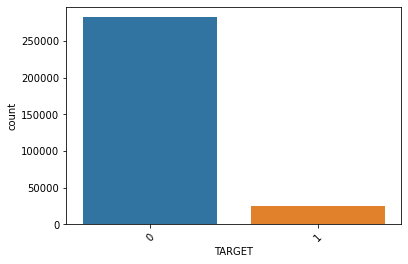

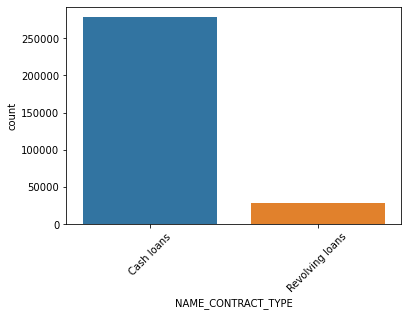

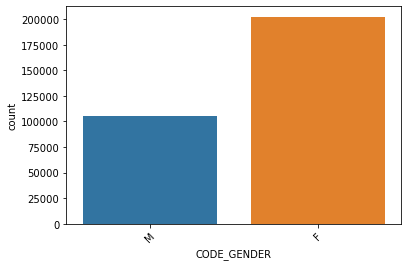

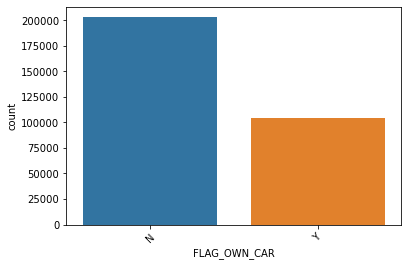

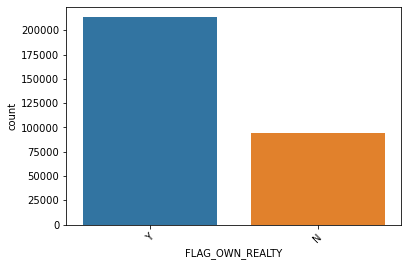

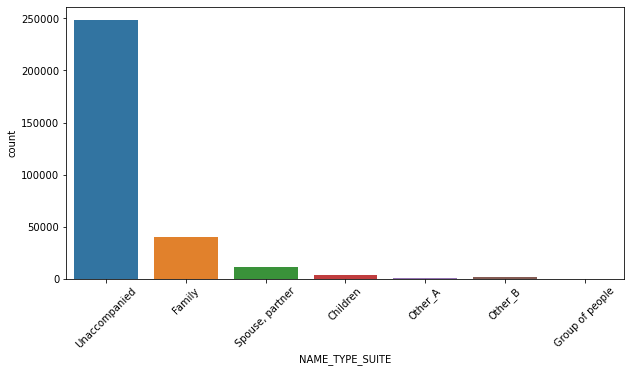

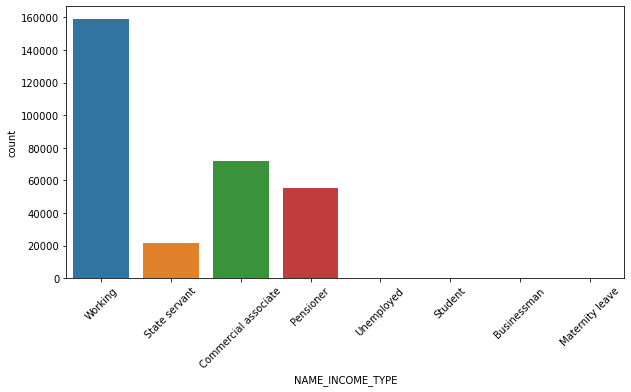

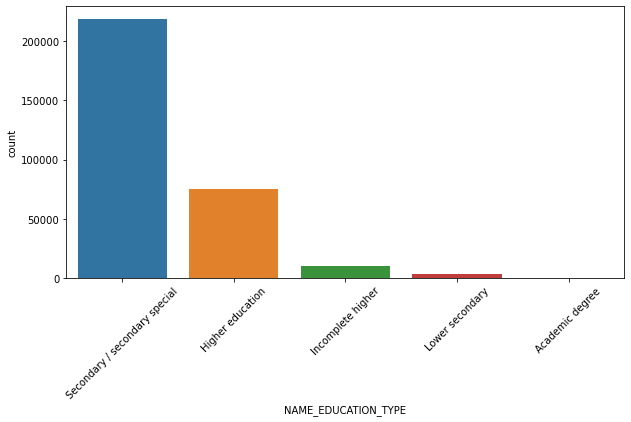

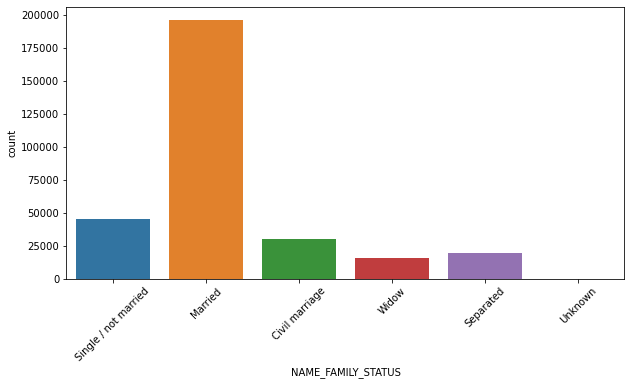

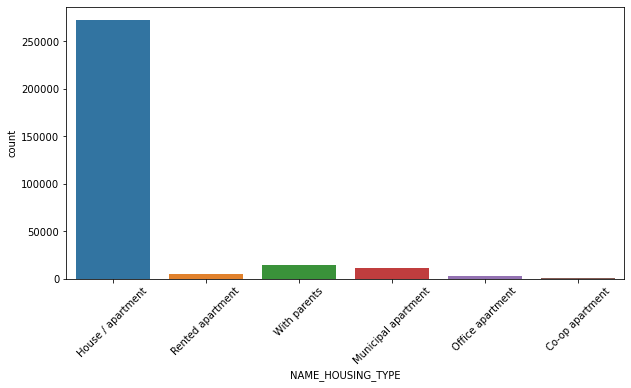

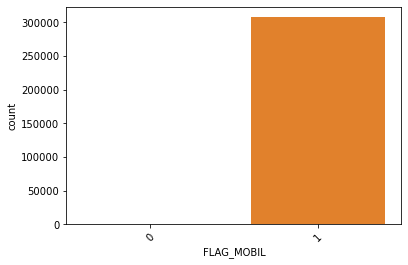

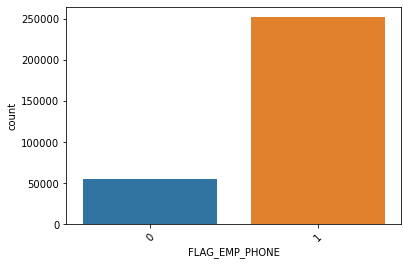

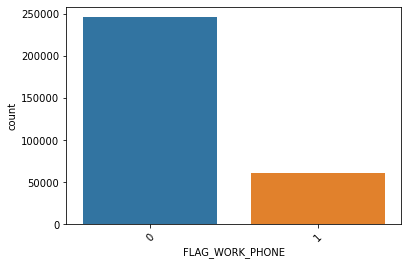

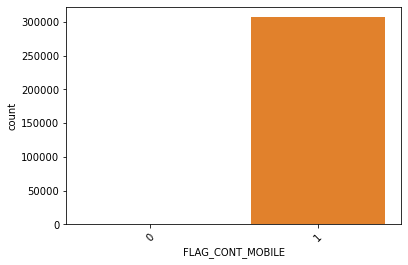

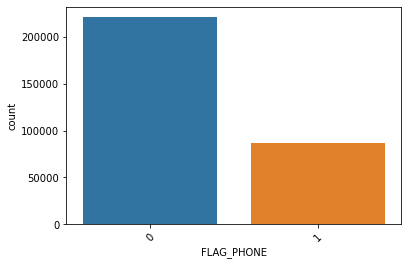

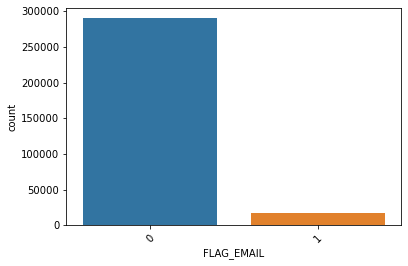

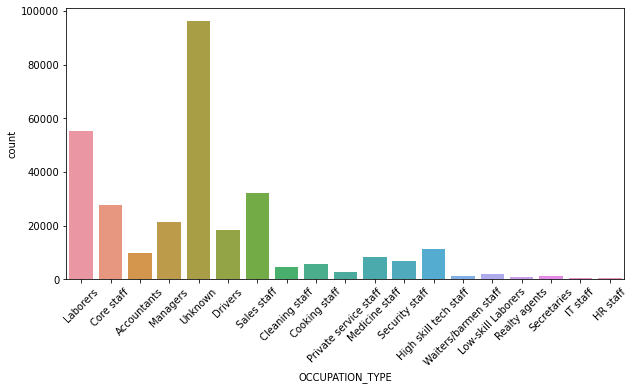

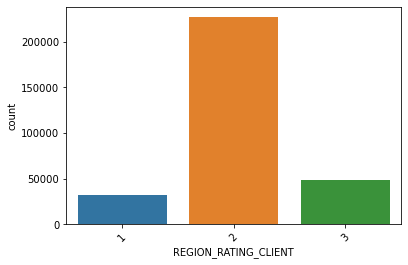

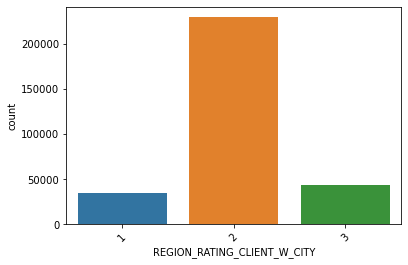

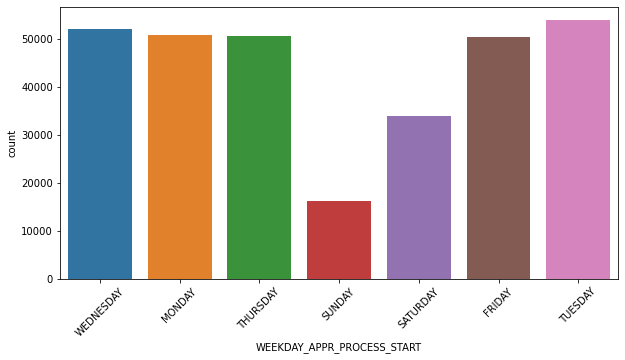

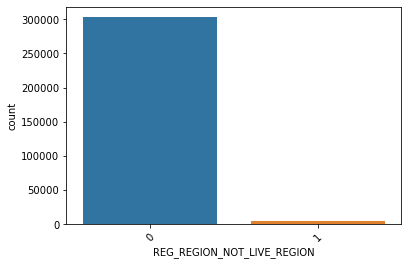

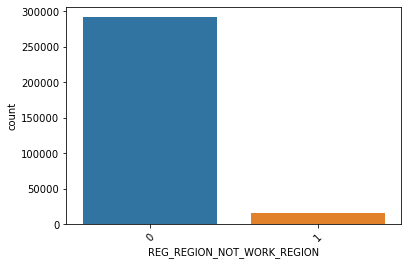

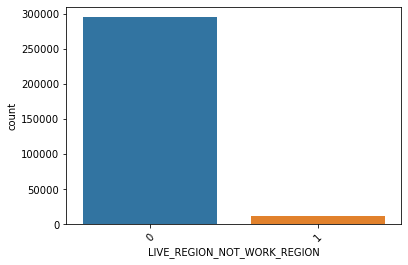

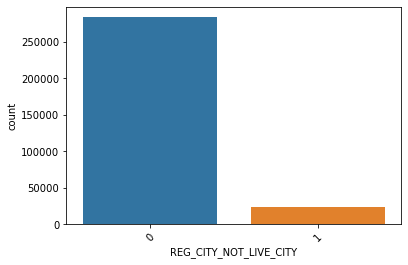

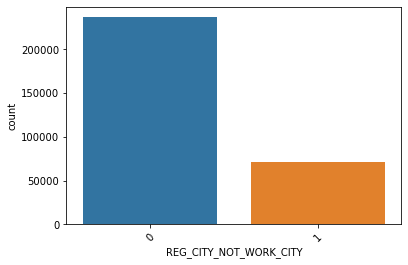

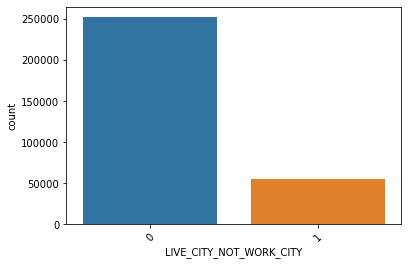

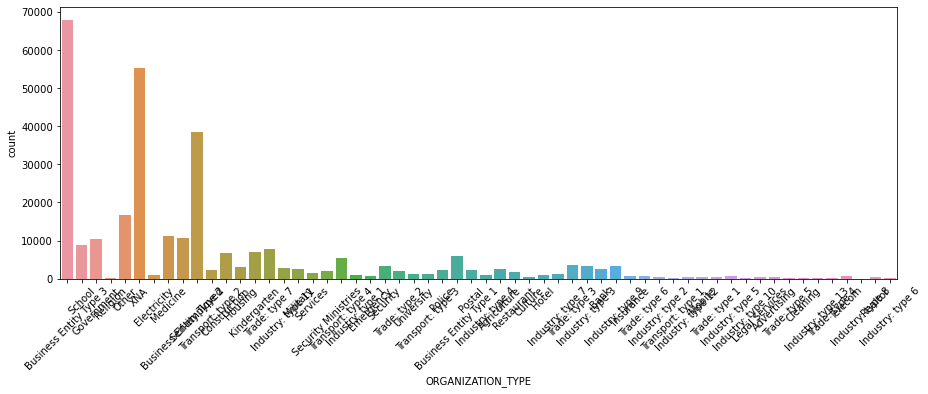

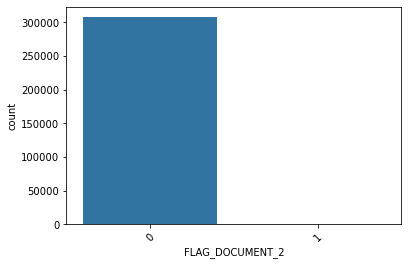

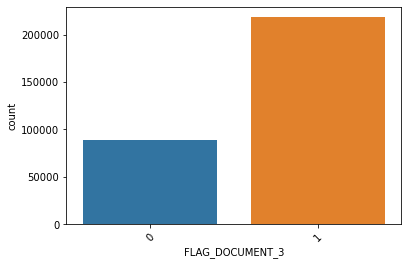

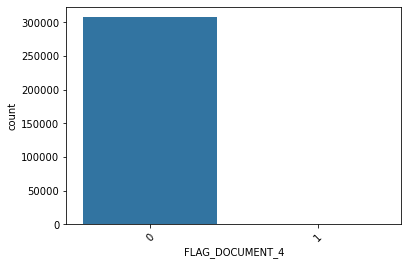

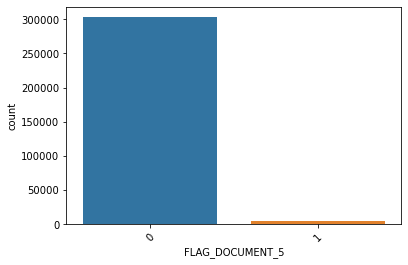

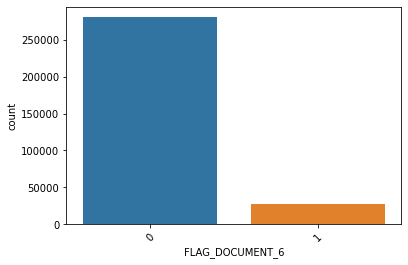

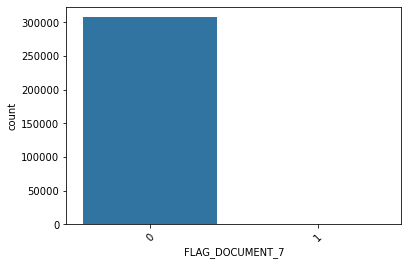

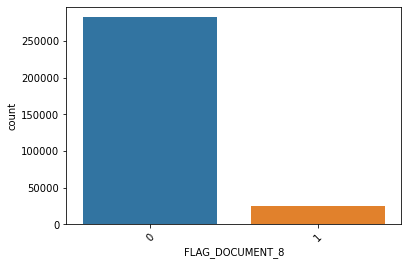

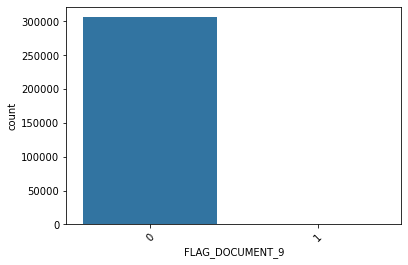

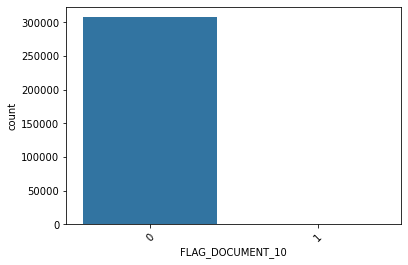

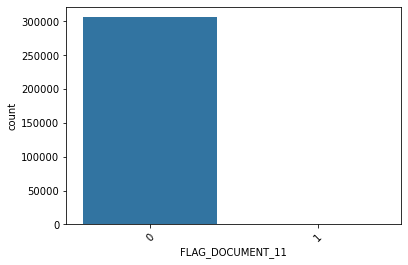

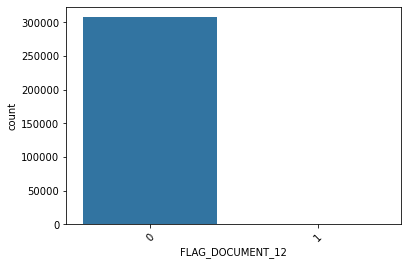

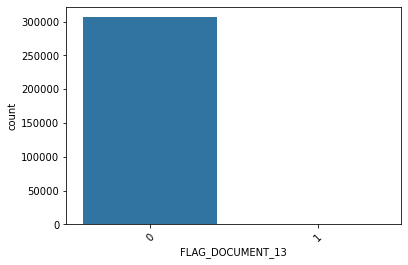

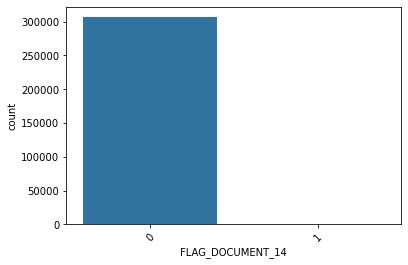

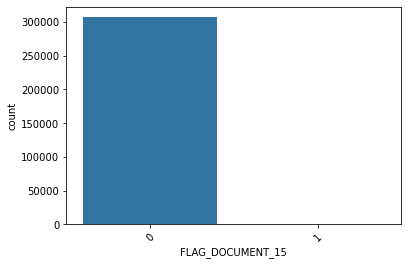

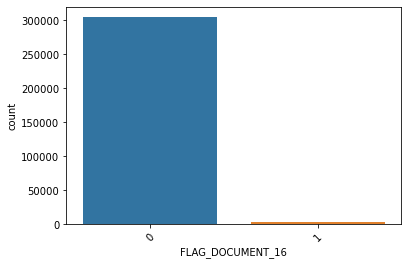

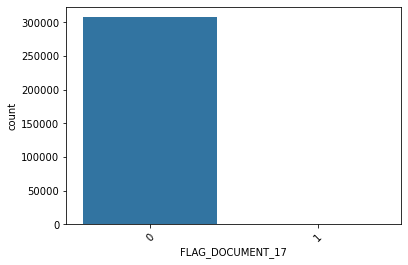

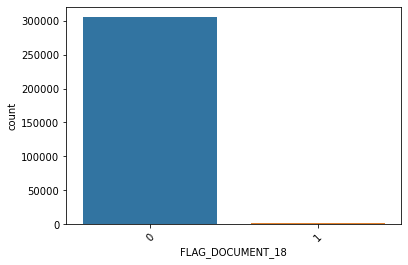

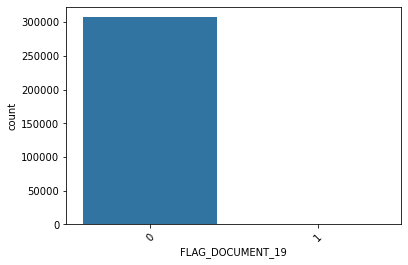

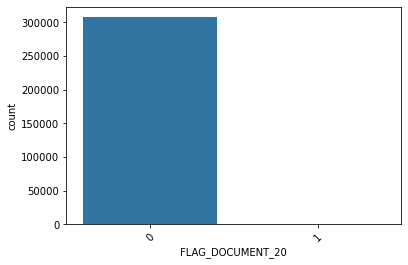

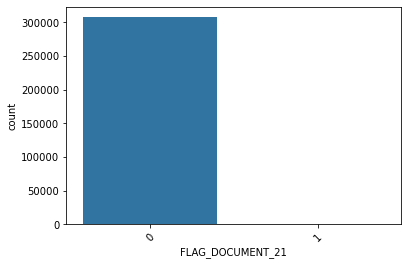

In [14]:

all_categorical_col = applications.select_dtypes("object").columns.tolist()
all_categorical_col_df = applications[all_categorical_col]
all_categorical_col_df.describe()
# plt.subplot(12, 4,)
idx = 0

# count plot
print("Plot for all catogorical columns, Total col:{}".format(len(all_categorical_col_df.columns)))
for each in all_categorical_col_df:
    idx+=1
    if each=="ORGANIZATION_TYPE":
        plt.figure(figsize = (15, 5))
    elif (all_categorical_col_df[each].nunique()>3):
        plt.figure(figsize = (10, 5))
    sns.countplot(all_categorical_col_df[each])
    plt.xticks(rotation=45)
    plt.show()



## 6. Observation for categorical columns


## 7. Numerical columns treatment

In [15]:
all_numerical_col = applications.select_dtypes("int64").columns.tolist() + applications.select_dtypes("float64").columns.tolist()
# print("int64 col: {0}".format(len(applications.select_dtypes("int64").columns.tolist())))
# print("flot64  col: {0}".format(len(applications.select_dtypes("float64").columns.tolist())))
# print(applications[all_numerical_col].isnull().sum())
all_numerical_df = applications[all_numerical_col]
print(all_numerical_df.shape)
all_numerical_df.describe().apply(lambda col: col.apply('{0:.4f}'.format))
def age_category(age):
    if age<=20:
        return "0-20"
    elif age>20 and age <=30:
        return "20-30"
    elif age>30 and age <=40:
        return "30-40"
    elif age>40 and age <=50:
        return "40-50"
    elif age>50 and age <=60:
        return "50-60"
    elif age>60 and age <=60:
        return "70-+"
    
bins=[20,25,30,35,40,45,50,55,60,65,70]
cat = ["20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70","70+"]
#Calculate using DAYS_BIRTH binning birt days
applications["Age"]=abs(applications['DAYS_BIRTH'])//365.25
applications["Age"].describe()
applications["Age"].astype("int64")
# Age boundries are between 20-69, grouping age from 20-70 by 5 years

applications["Age_Group"] = applications["Age"].apply(lambda x: age_category(x))
applications["Age"].head()
applications["Age_Group"].head()


#binning income group

#bins total income
labels=['Very low','Low','Medium','High','Very high']
applications['AMT_INCOME_TOTAL_Group']=pd.qcut(applications['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1], labels=labels)

applications['AMT_CREDIT_Group']=pd.qcut(applications['AMT_CREDIT'], q=[0,0.1,0.3,0.6,0.8,1], labels=labels)

## income ratio
# applications['CREDIT_INCOME_RATIO'].head()
# applications['AMT_CREDIT'].head()
applications['CREDIT_INCOME_RATIO']=round((applications['AMT_CREDIT']/applications['AMT_INCOME_TOTAL']))
applications['CREDIT_INCOME_RATIO_Group']=pd.qcut(applications['CREDIT_INCOME_RATIO'], q=[0,0.1,0.3,0.6,0.8,1], labels=labels)


# normalize AMT_GOODS_PRICE
applications['AMT_GOODS_PRICE_Group'] = round((applications['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100),2)
applications['AMT_GOODS_PRICE_Group'].value_counts().head()

applications['AMT_GOODS_PRICE_Group_category'] = pd.cut(applications['AMT_GOODS_PRICE'], bins = 5, labels = labels)
applications['AMT_GOODS_PRICE_Group_category'].value_counts()

(307511, 26)


Very low     246973
Low           56087
Medium         4108
High             47
Very high        18
Name: AMT_GOODS_PRICE_Group_category, dtype: int64

In [16]:
# convert  negative value to absolute for few columns
correct_negative_value_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
for col in correct_negative_value_col:
    applications[col] = applications[col].abs()

In [17]:
applications["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

## 8. Plot for numerical columns analysis

Plot for all numerical columns, Total col:26
['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


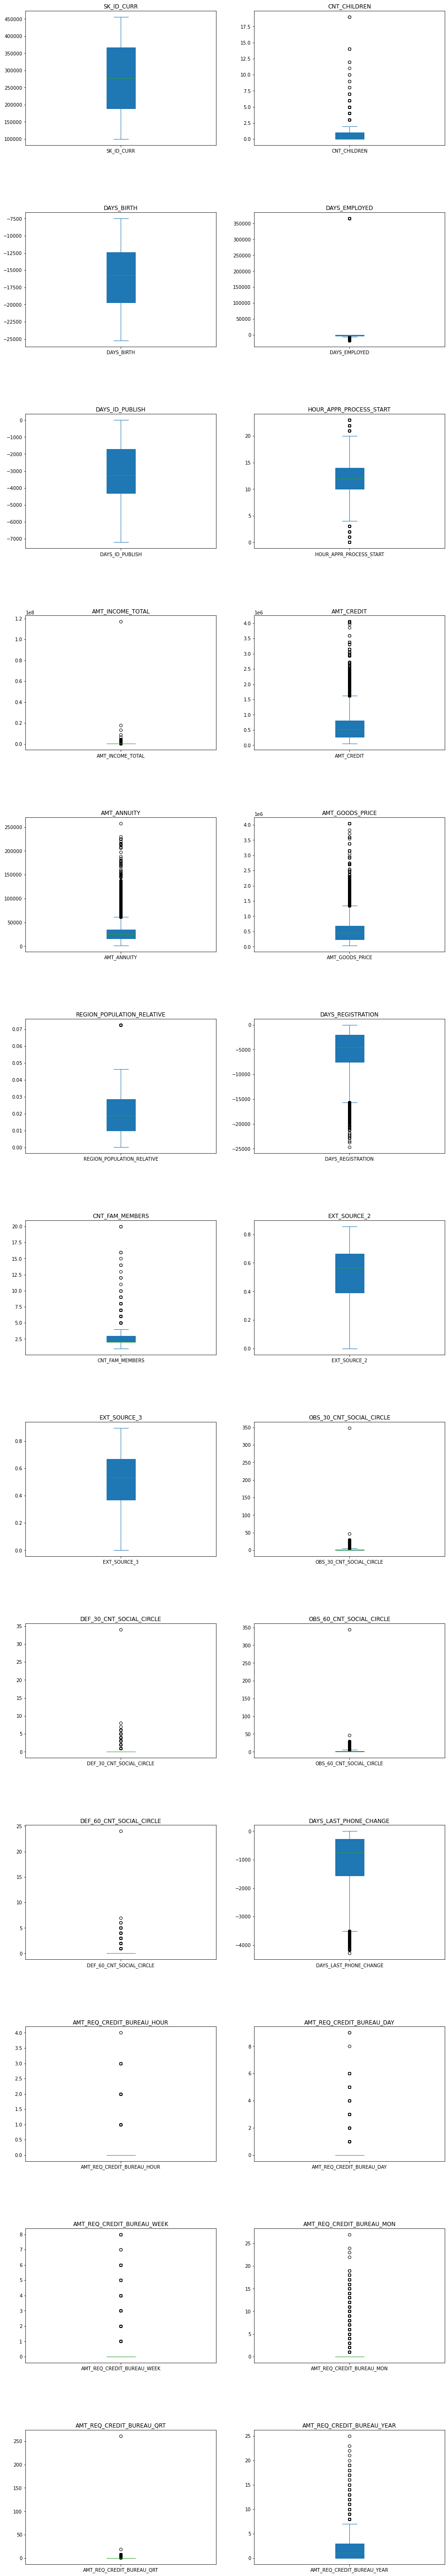

In [18]:

print("Plot for all numerical columns, Total col:{}".format(len(all_numerical_df.columns)))
fig, axs = plt.subplots(nrows=13, ncols=2, figsize=(16, 100))
idx=0
plt.subplots_adjust(hspace=0.5)
# print(dir(all_numerical_df[all_numerical_col[n]].plot))

print(all_numerical_col)
for col in all_numerical_col:
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(13, 2, idx + 1)

    # filter df and plot on the new subplot axis
    all_numerical_df[all_numerical_col[idx]].plot.box(ax=ax, patch_artist = True)

    # chart formatting
    ax.set_title(col.upper())
    idx+=1
    
plt.show()


#####################################
Analysis for column SK_ID_CURR


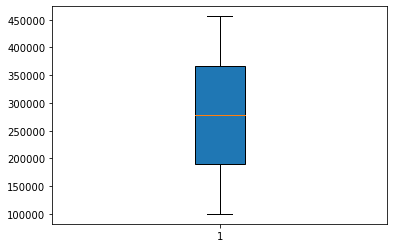

Upper whisker:634138.0
Lower whisker:-77850.0
#####################################
Analysis for column CNT_CHILDREN


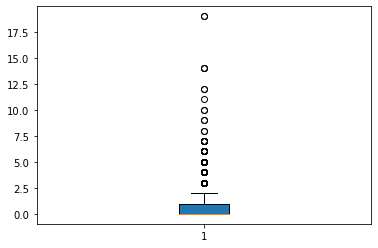

Upper whisker:2.5
Lower whisker:-1.5
#####################################
Analysis for column DAYS_BIRTH
Skipping analysing due to low bounderies value
#####################################
Analysis for column DAYS_EMPLOYED


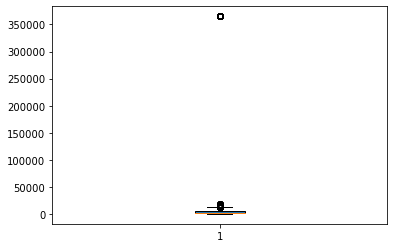

Upper whisker:3417.5
Lower whisker:-6466.5
#####################################
Analysis for column DAYS_ID_PUBLISH


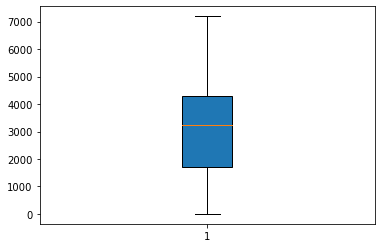

Upper whisker:2148.5
Lower whisker:-8167.5
#####################################
Analysis for column HOUR_APPR_PROCESS_START


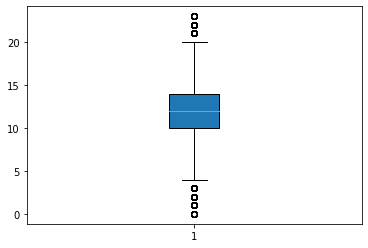

Upper whisker:20.0
Lower whisker:4.0
#####################################
Analysis for column AMT_INCOME_TOTAL


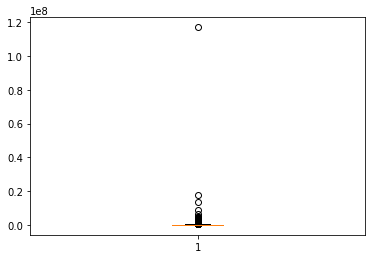

Upper whisker:337500.0
Lower whisker:-22500.0
#####################################
Analysis for column AMT_CREDIT


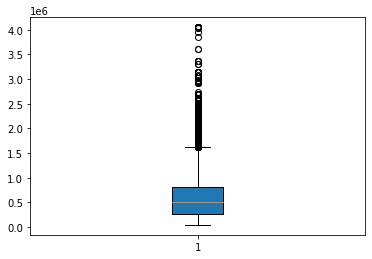

Upper whisker:1616625.0
Lower whisker:-537975.0
#####################################
Analysis for column AMT_ANNUITY


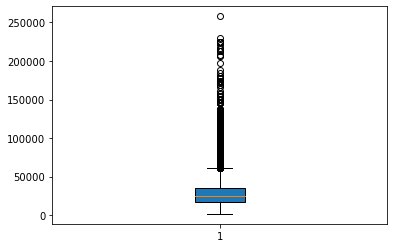

Upper whisker:61704.0
Lower whisker:-10584.0
#####################################
Analysis for column AMT_GOODS_PRICE


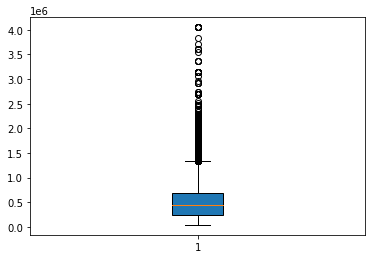

Upper whisker:1341000.0
Lower whisker:-423000.0
#####################################
Analysis for column REGION_POPULATION_RELATIVE


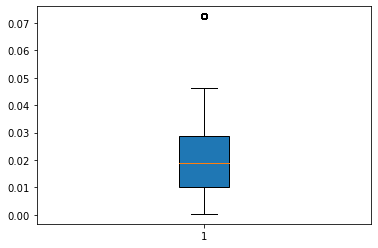

Upper whisker:0.056648500000000004
Lower whisker:-0.017979500000000002
#####################################
Analysis for column DAYS_REGISTRATION


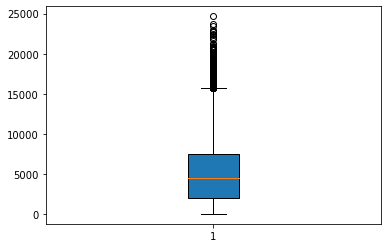

Upper whisker:6194.25
Lower whisker:-15683.75
#####################################
Analysis for column CNT_FAM_MEMBERS


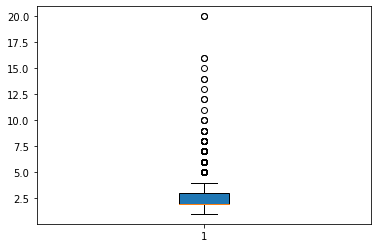

Upper whisker:4.5
Lower whisker:0.5
#####################################
Analysis for column EXT_SOURCE_2


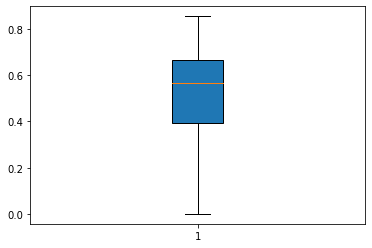

Upper whisker:1.0703566001060345
Lower whisker:-0.014282094178385663
#####################################
Analysis for column EXT_SOURCE_3


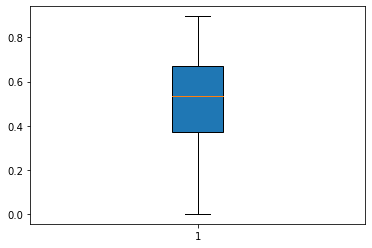

Upper whisker:1.1166672884610378
Lower whisker:-0.07696096134865194
#####################################
Analysis for column OBS_30_CNT_SOCIAL_CIRCLE


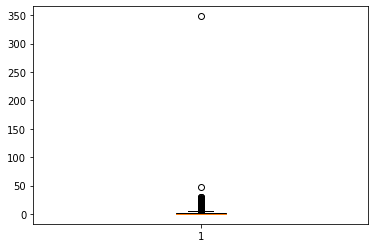

Upper whisker:5.0
Lower whisker:-3.0
#####################################
Analysis for column DEF_30_CNT_SOCIAL_CIRCLE
Skipping analysing due to low bounderies value
#####################################
Analysis for column OBS_60_CNT_SOCIAL_CIRCLE


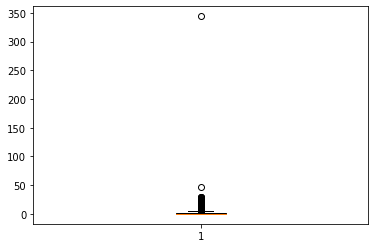

Upper whisker:5.0
Lower whisker:-3.0
#####################################
Analysis for column DEF_60_CNT_SOCIAL_CIRCLE
Skipping analysing due to low bounderies value
#####################################
Analysis for column DAYS_LAST_PHONE_CHANGE


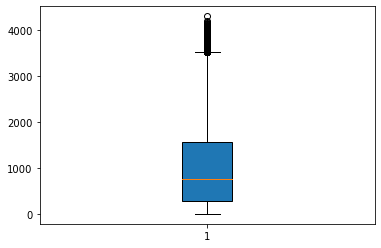

Upper whisker:1670.0
Lower whisker:-3514.0
#####################################
Analysis for column AMT_REQ_CREDIT_BUREAU_HOUR
Skipping analysing due to low bounderies value
#####################################
Analysis for column AMT_REQ_CREDIT_BUREAU_DAY
Skipping analysing due to low bounderies value
#####################################
Analysis for column AMT_REQ_CREDIT_BUREAU_WEEK
Skipping analysing due to low bounderies value
#####################################
Analysis for column AMT_REQ_CREDIT_BUREAU_MON
Skipping analysing due to low bounderies value
#####################################
Analysis for column AMT_REQ_CREDIT_BUREAU_QRT
Skipping analysing due to low bounderies value
#####################################
Analysis for column AMT_REQ_CREDIT_BUREAU_YEAR


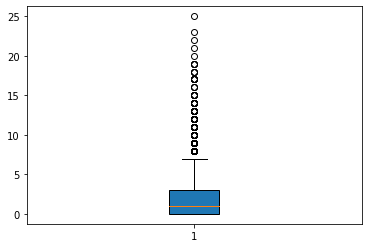

Upper whisker:7.5
Lower whisker:-4.5


In [19]:

### Numerical column to check outliers
for col in all_numerical_col:
    print("#####################################")
    print("Analysis for column {}".format(col))
    without_null_data = applications[~np.isnan(applications[col])]
    q1 = all_numerical_df[col].quantile(0.25)
    q3 = all_numerical_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - (1.5*iqr)
    upper_wisker = q3 + (1.5*iqr)
    if (lower_whisker>0 or upper_wisker>0):
        plt.boxplot(without_null_data[col], patch_artist = True)
        plt.show()
        print("Upper whisker:{}".format(upper_wisker))
        print("Lower whisker:{}".format(lower_whisker))
    else:
        print("Skipping analysing due to low bounderies value")
    
    
    

In [49]:
applications["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
Impute EXT_SOURCE_2 value with 0.51


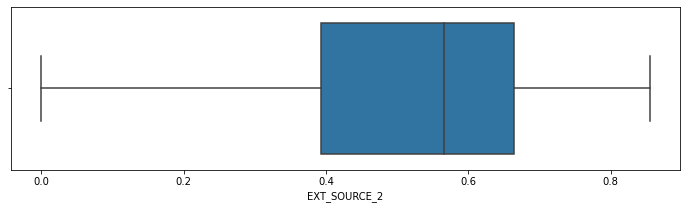

In [20]:
# analysising EXT_SOURCE_2  continuous column  
print(applications["EXT_SOURCE_2"].describe())
plt.figure(figsize=[12, 3])
# plotting distribution of EXT_SOURCE_2
sns.boxplot(applications["EXT_SOURCE_2"])
'''
since as per observation of EXT_SOURCE_2 describe result and
boxplot distibution for EXT_SOURCE_2, there is not an outliers for "EXT_SOURCE_2" column and
mean median has not much difference so we can replace null values with median or mean.

'''
replace_value = applications["EXT_SOURCE_2"].mean()
print("Impute EXT_SOURCE_2 value with {0}".format(round(replace_value, 2)))

## 9. Observation for numerical columns


## 10. Checking imbalance Target

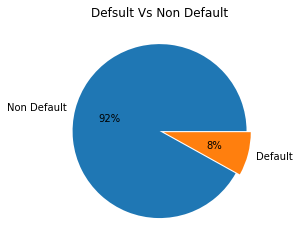

In [21]:
applications["TARGET"].value_counts(normalize=True)*100
#as per counts there are 91.92% non_defaulter customer and 8.07% defaulter customer


plt.pie(applications["TARGET"].value_counts(normalize=True)*100,labels=["Non Default","Default"],explode=(0,0.05),autopct='%1.f%%')
plt.title("Defsult Vs Non Default")
plt.show()

In [70]:
default_customer = applications[applications["TARGET"]==1]
non_default_customer = applications[applications["TARGET"]==0]
non_default_customer.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

## 11. Univariate analysis

81
CODE_GENDER


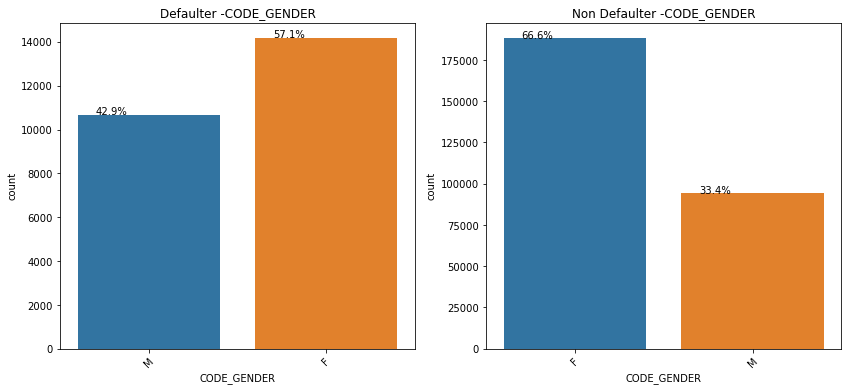

FLAG_OWN_CAR


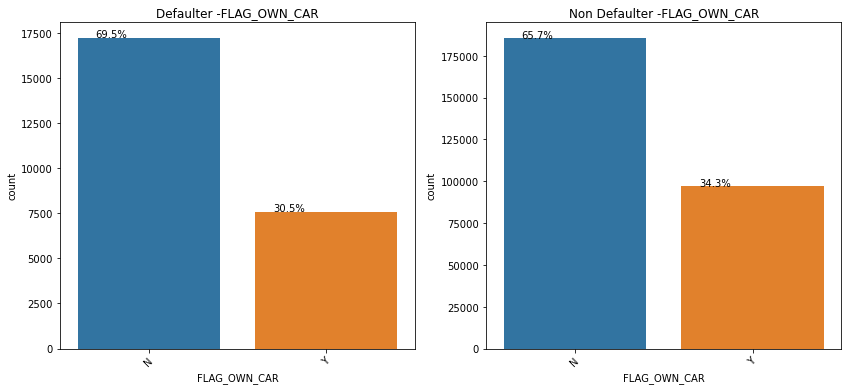

NAME_INCOME_TYPE


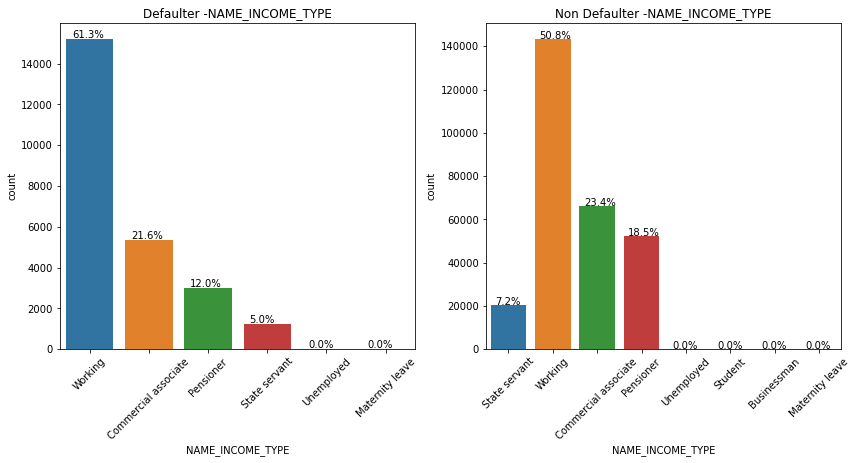

NAME_FAMILY_STATUS


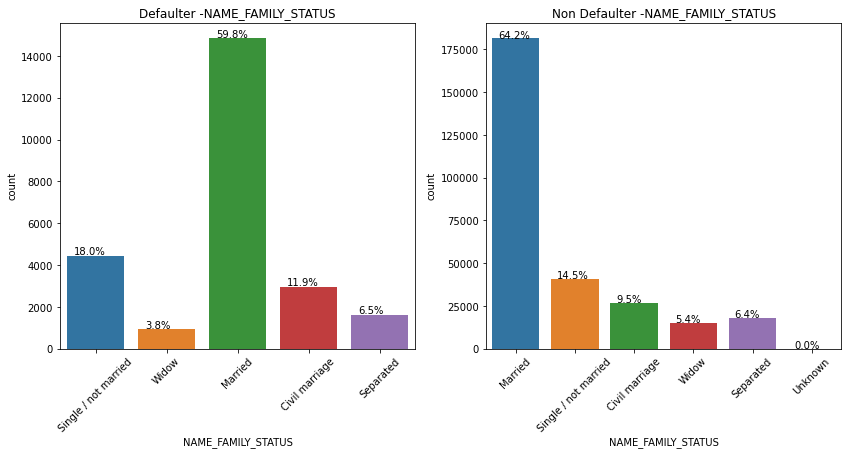

NAME_HOUSING_TYPE


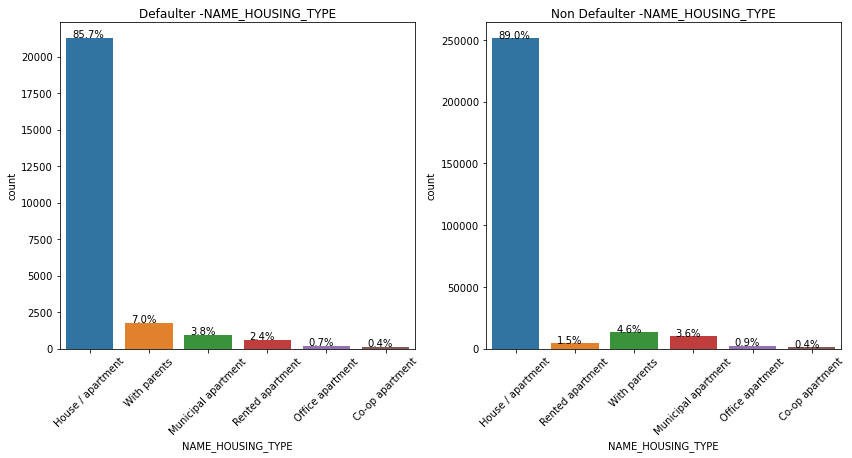

NAME_EDUCATION_TYPE


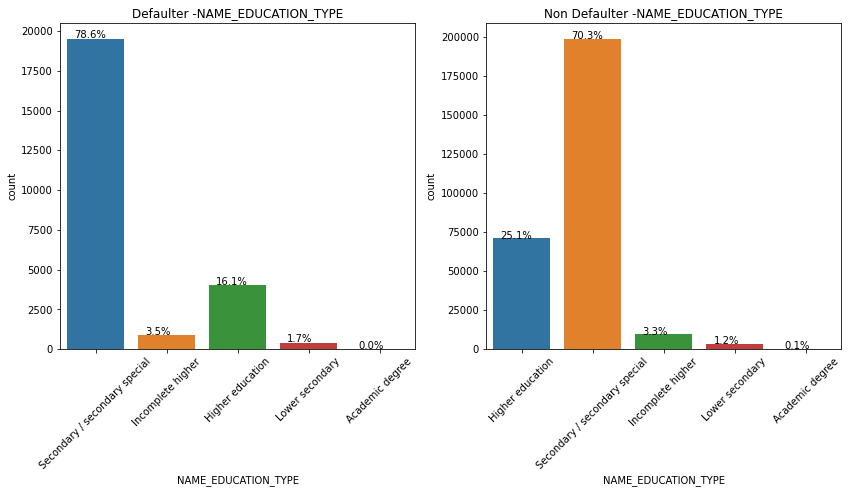

REGION_RATING_CLIENT


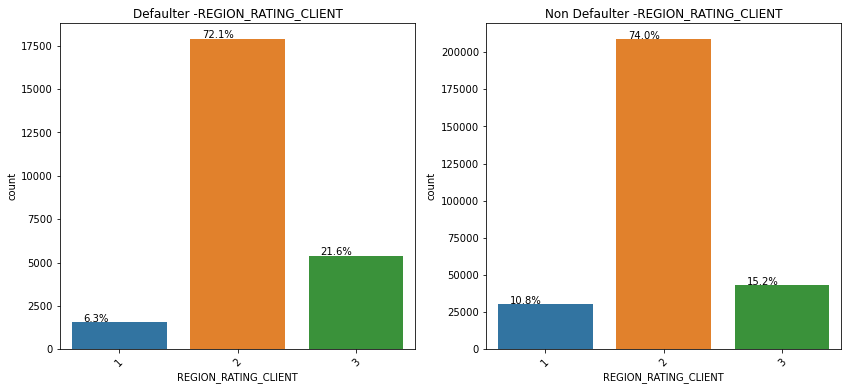

In [23]:
# Univarient analysis for all categorical variables verses defaulter customer and non defaulter customer 
# all_categorical_col = applications.select_dtypes("object").columns.tolist()
# all_categorical_col_df = applications[all_categorical_col]

print(len(default_customer.columns))
# plt.subplots_adjust(hspace=2)

def plotvarient(col,hue=None, sort=False):
    print(col)

    fig,(ax_default ,ax_non_default) = plt.subplots(1, 2, figsize=(14, 6))
    
    if hue:
        sns.countplot(x=col, data=default_customer, ax=ax_default,hue=hue)
    else:
        sns.countplot(x=col, data=default_customer, ax=ax_default)
    ax_default.set_title("Defaulter -{}".format(col.upper()))
    ax_default.set_xticklabels(ax_default.get_xticklabels(), rotation=45)
    
    for pt in ax_default.patches:
        ax_default.annotate(
            "{:.1f}%".format(
                (pt.get_height()/len(default_customer))*100), (pt.get_x()+0.1, pt.get_height()+50)
        )
    if hue:
        sns.countplot(x=col, data=non_default_customer, ax=ax_non_default, hue=hue)
    else:
        sns.countplot(x=col, data=non_default_customer, ax=ax_non_default)
        
    ax_non_default.set_title("Non Defaulter -{}".format(col.upper()))
    ax_non_default.set_xticklabels(ax_non_default.get_xticklabels(), rotation=45)

    for pt in ax_non_default.patches:
        ax_non_default.annotate(
            "{:.1f}%".format(
                (pt.get_height()/len(non_default_customer))*100), (pt.get_x()+0.1, pt.get_height()+50)
        )    
    
    plt.show()
all_categorical_col = ["CODE_GENDER","FLAG_OWN_CAR","NAME_INCOME_TYPE", "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE", "NAME_EDUCATION_TYPE", "REGION_RATING_CLIENT"]
for each in all_categorical_col:
    plotvarient(each)


CODE_GENDER


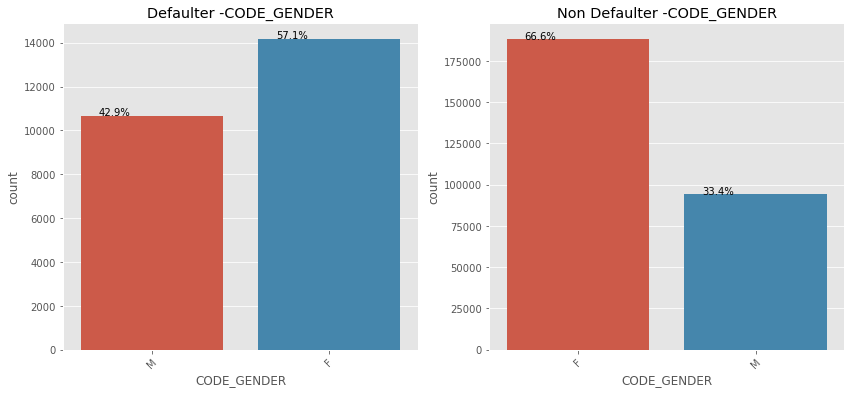

In [73]:
plotvarient("CODE_GENDER")

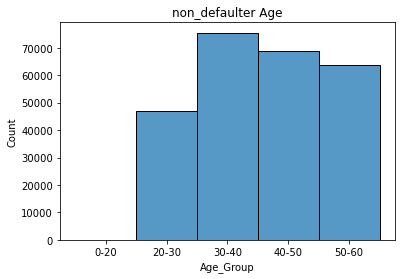

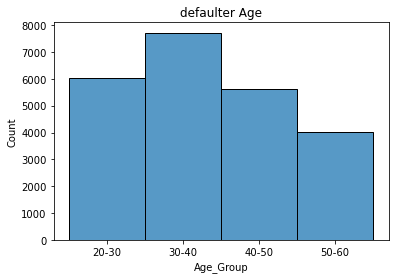

AMT_INCOME_TOTAL_Group


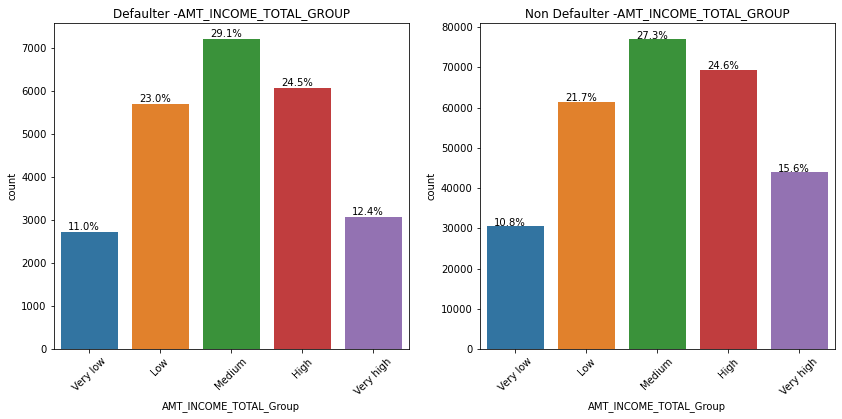

AMT_CREDIT_Group


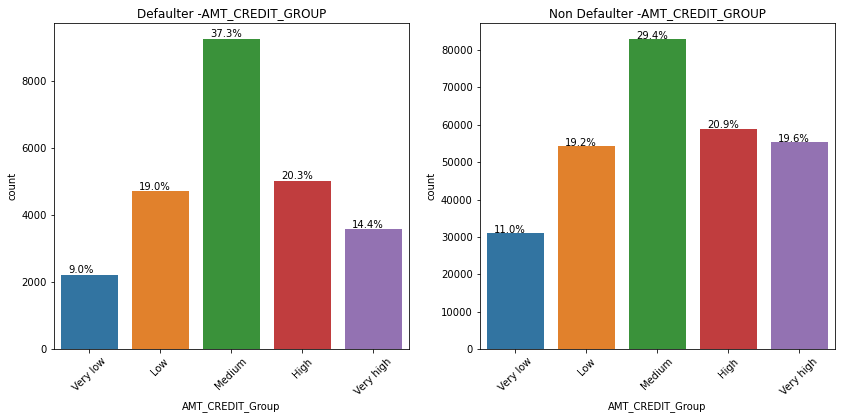

CREDIT_INCOME_RATIO_Group


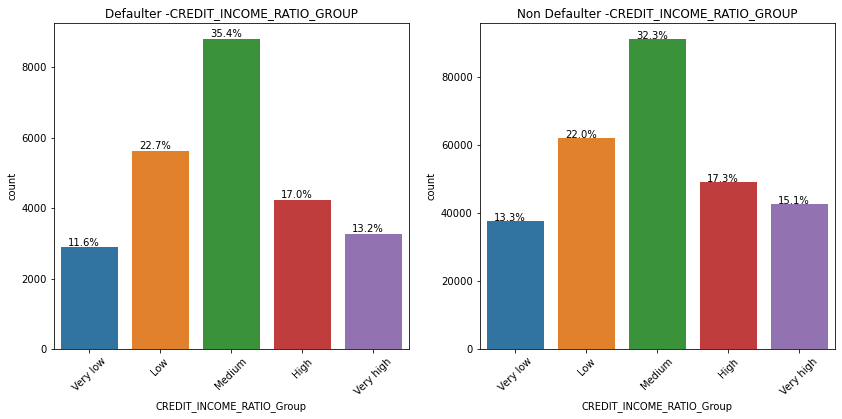

In [24]:
# Univarient analysis for continuous variable


# sns.pairplot(data=non_default_customer, vars=['Age_Group'],  diag_kind = 'kde')
# plt.show()
# applications.Age_Group.value_counts()
sorted_data = applications.sort_values('Age', ascending=True)
applications["Age_Group"].head()
sorted_non_default_by_age_grp = non_default_customer.sort_values('Age_Group', ascending=True)

sorted_default_by_age_grp = default_customer.sort_values('Age_Group', ascending=True)

sns.histplot(sorted_non_default_by_age_grp["Age_Group"],bins=["0-20","20-30","30-40","40-50","50-60","70-+"]).set(title="non_defaulter Age")
plt.show()
sns.histplot(sorted_default_by_age_grp["Age_Group"],bins=["0-20","20-30","30-40","40-50","50-60","70-+"]).set(title="defaulter Age")
plt.show()
non_default_customer.describe()

# plot_univarient("Age_Group")

# plot_univarient("AMT_INCOME_TOTAL") #need bins graph in AMT_INCOME_TOTAL_Group

plotvarient("AMT_INCOME_TOTAL_Group")
plotvarient("AMT_CREDIT_Group")
plotvarient("CREDIT_INCOME_RATIO_Group")


## 12. Bivariate-analysis

NAME_INCOME_TYPE


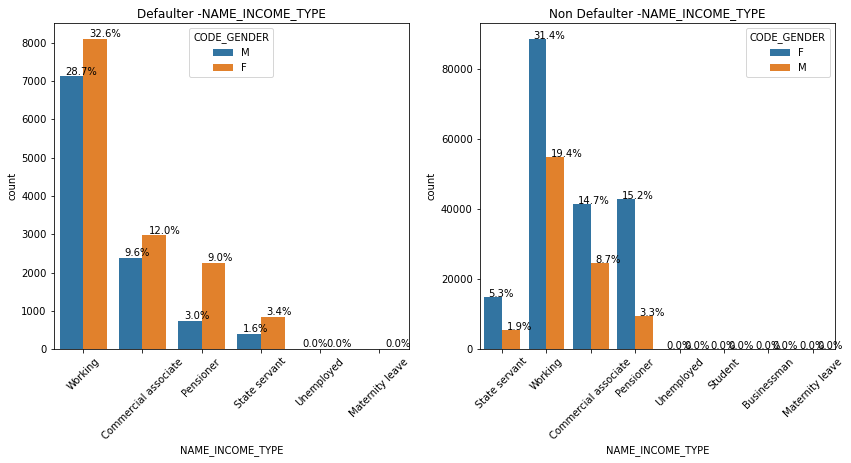

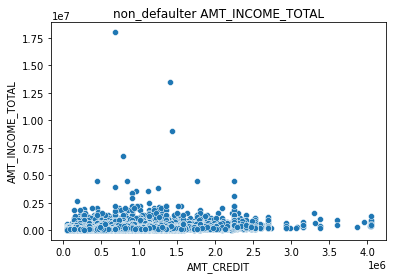

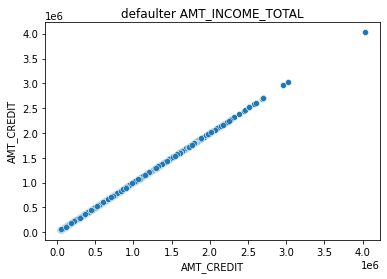

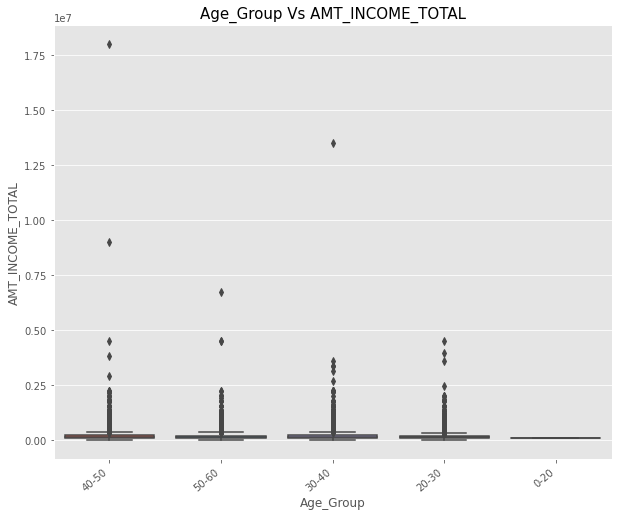

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

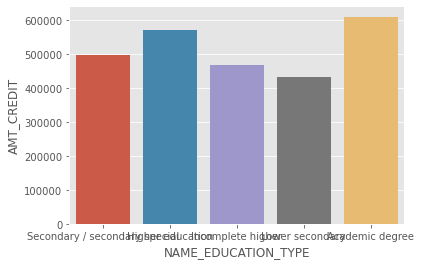

In [25]:
all_conti_col = ["AMT_INCOME_TOTAL", "Age"]
plotvarient("NAME_INCOME_TYPE", hue="CODE_GENDER")
# sns.pairplot(non_default_customer[all_conti_col])
sns.scatterplot(non_default_customer["AMT_CREDIT"],non_default_customer["AMT_INCOME_TOTAL"]).set(title="non_defaulter AMT_INCOME_TOTAL")
plt.show()
sns.scatterplot(default_customer["AMT_CREDIT"],default_customer["AMT_CREDIT"]).set(title="defaulter AMT_INCOME_TOTAL")
plt.show()

#by variant analysis function
def bi_variate(data, category, numcol):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxplot(x=category,y = numcol, data=data)
    ax.set_ylabel(f'{numcol}')
    ax.set_xlabel(f'{category}')

    ax.set_title(f'{category} Vs {numcol}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()
    
bi_variate(non_default_customer, "Age_Group", "AMT_INCOME_TOTAL" )
#Bivariate-analysis using bar plot , It is used to show the statistical distribution (mean/median/std/var etc etc)
#of a continuous variable against a categorical variable

sns.barplot(applications["NAME_EDUCATION_TYPE"],applications["AMT_CREDIT"],ci=None,estimator=np.median)
#by default --> mean


## 13. Multivariate Analysis

all_numerical_col: ['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


'\n-1 --> Strong Negative Correlation\n0 --> No Correlation\n1 --> Strong Positive Correlation\n'

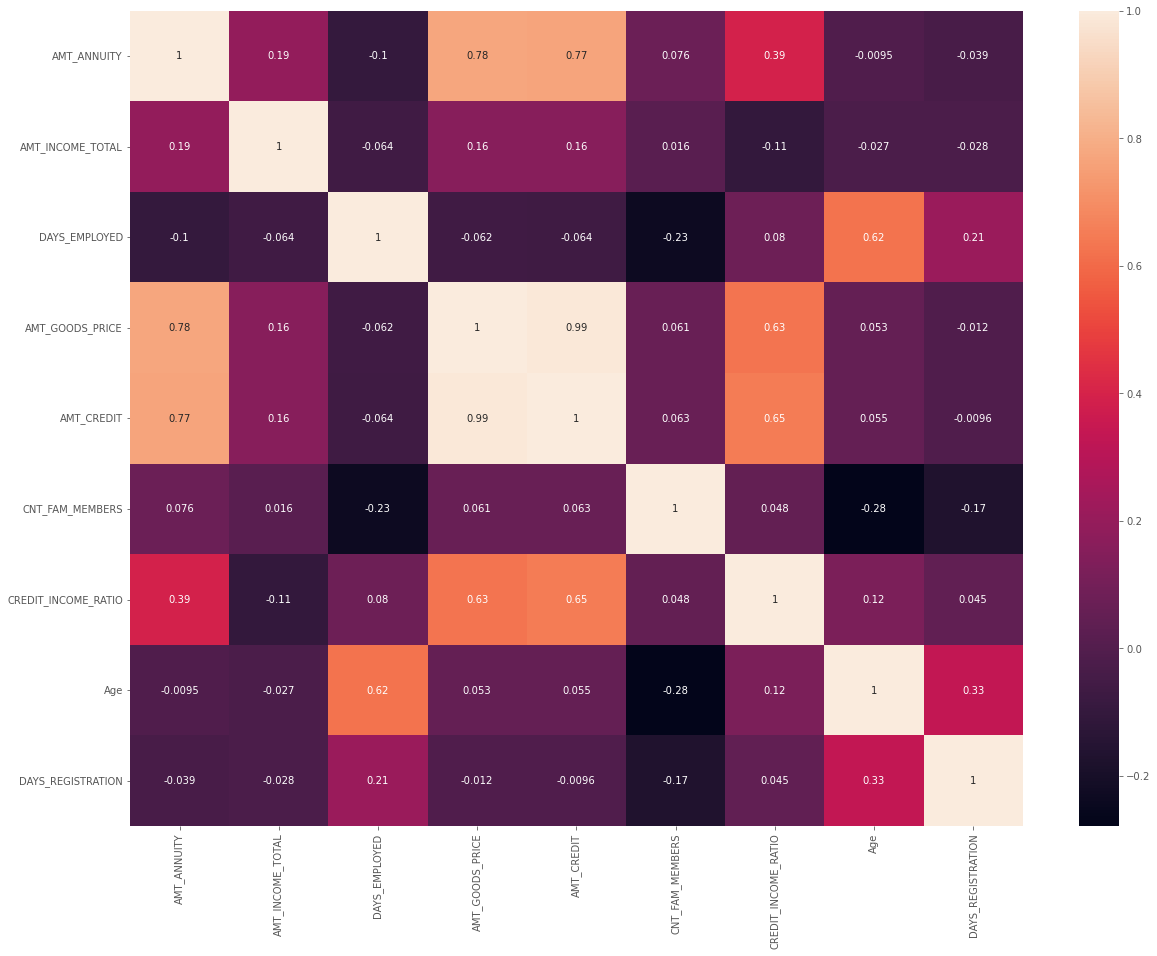

In [26]:
#round((applications['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100),2)
plt.figure(figsize=(20,15))
num_col = ["AMT_ANNUITY","AMT_INCOME_TOTAL", "DAYS_EMPLOYED","AMT_GOODS_PRICE","AMT_CREDIT", "CNT_FAM_MEMBERS","CREDIT_INCOME_RATIO","Age","DAYS_REGISTRATION"]
print("all_numerical_col:", all_numerical_col)
sns.heatmap(applications[num_col].corr(),annot=True)
"""
-1 --> Strong Negative Correlation
0 --> No Correlation
1 --> Strong Positive Correlation
"""

## 14. previous_application data

**Understanding  data structure for pre_applications dataFrame**

In [27]:
#check shape of dataFrame 
pre_applications = pd.read_csv("../Credit_EDA_CaseStudy_Vedanti_DS_C46/Credit_EDA_Case_Study_datasets/previous_application.csv")

print(pre_applications.shape) 

# head to check few data from previous_applications dataFrame
pre_applications.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# check each data type and null values for previous_applications dataset
pre_applications.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [29]:
# Describe of previous_applications dataFrame
# apply function to supress scientific notation from each column's statistics

pre_applications.describe().apply(lambda col: col.apply('{0:.4f}'.format))


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.0000,1670214.0000,1297979.0000,1670214.0000,1670213.0000,774370.0000,1284699.0000,1670214.0000,1670214.0000,774370.0000,5951.0000,5951.0000,1670214.0000,1670214.0000,1297984.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000
mean,1923089.1353,278357.1741,15955.1207,175233.8604,196114.0212,6697.4021,227847.2793,12.4842,0.9965,0.0796,0.1884,0.7735,-880.6797,313.9511,16.0541,342209.8550,13826.2693,33767.7741,76582.4031,81992.3438,0.3326
std,532597.9587,102814.8238,14782.1373,292779.7624,318574.6165,20921.4954,315396.5579,3.3340,0.0593,0.1078,0.0877,0.1009,779.0997,7127.4435,14.5673,88916.1158,72444.8697,106857.0348,149647.4151,153303.5167,0.4711
min,1000001.0000,100001.0000,0.0000,0.0000,0.0000,-0.9000,0.0000,0.0000,0.0000,-0.0000,0.0348,0.3732,-2922.0000,-1.0000,0.0000,-2922.0000,-2892.0000,-2801.0000,-2889.0000,-2874.0000,0.0000
25%,1461857.2500,189329.0000,6321.7800,18720.0000,24160.5000,0.0000,50841.0000,10.0000,1.0000,0.0000,0.1607,0.7156,-1300.0000,-1.0000,6.0000,365243.0000,-1628.0000,-1242.0000,-1314.0000,-1270.0000,0.0000
50%,1923110.5000,278714.5000,11250.0000,71046.0000,80541.0000,1638.0000,112320.0000,12.0000,1.0000,0.0516,0.1891,0.8351,-581.0000,3.0000,12.0000,365243.0000,-831.0000,-361.0000,-537.0000,-499.0000,0.0000
75%,2384279.7500,367514.0000,20658.4200,180360.0000,216418.5000,7740.0000,234000.0000,15.0000,1.0000,0.1089,0.1933,0.8525,-280.0000,82.0000,24.0000,365243.0000,-411.0000,129.0000,-74.0000,-44.0000,1.0000
max,2845382.0000,456255.0000,418058.1450,6905160.0000,6905160.0000,3060045.0000,6905160.0000,23.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,4000000.0000,84.0000,365243.0000,365243.0000,365243.0000,365243.0000,365243.0000,1.0000


In [30]:
# Missing values percentages in pre_applications dataframe
pd.set_option('display.max_rows', None)

# Missing values percentages in applications dataframe
app_row, col = pre_applications.shape
null_count = pre_applications.isnull().sum()
null_percentage = round((pre_applications.isnull().sum()/app_row)*100,2)
null_display = pd.DataFrame({"Null percentage": null_percentage, "Null count": null_count, "Dtype":pre_applications.dtypes})
print(null_display.shape)
null_display.sort_values(by = "Null percentage", ascending=False)

(37, 3)


,Null percentage,Null count,Dtype
RATE_INTEREST_PRIVILEGED,99.64,1664263,float64
RATE_INTEREST_PRIMARY,99.64,1664263,float64
RATE_DOWN_PAYMENT,53.64,895844,float64
AMT_DOWN_PAYMENT,53.64,895844,float64
NAME_TYPE_SUITE,49.12,820405,object
NFLAG_INSURED_ON_APPROVAL,40.30,673065,float64
DAYS_FIRST_DRAWING,40.30,673065,float64
DAYS_FIRST_DUE,40.30,673065,float64
DAYS_LAST_DUE_1ST_VERSION,40.30,673065,float64
DAYS_LAST_DUE,40.30,673065,float64


In [31]:
# clear columns missing data > 40 %
# column name to be deleted 
col_to_del = null_display[null_display["Null percentage"] > 40].index.to_list()
print("No of column to be deleted:", len(col_to_del))
print("Column's label:" , col_to_del)
pre_applications.drop(columns = col_to_del, axis=1, inplace=True)

No of column to be deleted: 11
Column's label: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [32]:
null_below_35 = null_display[(null_display["Null percentage"] < 35)]
print(null_below_35.shape)


print("Below columns can be impute")
print("Null columns with < 35  :{0}".format(null_below_35.shape))

null_below_35.sort_values(by="Null percentage", ascending = False)


(26, 3)
Below columns can be impute
Null columns with < 35  :(26, 3)


,Null percentage,Null count,Dtype
AMT_GOODS_PRICE,23.08,385515,float64
AMT_ANNUITY,22.29,372235,float64
CNT_PAYMENT,22.29,372230,float64
PRODUCT_COMBINATION,0.02,346,object
NAME_PAYMENT_TYPE,0.00,0,object
NAME_YIELD_GROUP,0.00,0,object
NAME_SELLER_INDUSTRY,0.00,0,object
SELLERPLACE_AREA,0.00,0,int64
CHANNEL_TYPE,0.00,0,object
NAME_PRODUCT_TYPE,0.00,0,object


In [33]:
# categorical treatment to pre_applications
# WE CAN CONVERT DATATYPE TO CATEGORICAL IF NUMBER OF UNIQUE VALUES <=3 
unique_count = pre_applications.nunique()
categorical_less_3 = unique_count[unique_count<=3].index.tolist()
print("No {0} column found ", len(categorical_less_3))
for each_col in categorical_less_3:
    #print("Column name:", each_col, "Dtype:" , applications[each_col].dtype)
    if pre_applications[each_col].dtype in ["int64", "float64"]:
        pre_applications[each_col] = pre_applications[each_col].astype(object)
# print(applications.info())
# applications.head()

# observing unique values in each Catogorical column those values <3
for each_col in categorical_less_3:
    print("********************************")
    print("Column Name:{}".format(each_col))
    print(pre_applications[each_col].unique())
    
    
# observing unique values in each Catogorical column dtypes object except categorical_less_3 data

categorical_above_3 = [each for each in pre_applications.select_dtypes("object").columns.tolist() if each not in categorical_less_3]
print(categorical_above_3)
print(len(categorical_above_3))
categorical_above_3_dataset = pre_applications[categorical_above_3]
categorical_above_3_dataset.describe()

categorical_above_3_dataset.isnull().sum()
pre_applications

categorical_less_3 = unique_count[(unique_count<=7) &((unique_count>3))].index.tolist()
categorical_less_3

# from below list also we can treat few categorical columns
for each_col in categorical_less_3:
    print("********************************")
    print("Column Name:{}".format(each_col))
    print(pre_applications[each_col].unique())

No {0} column found  3
********************************
Column Name:FLAG_LAST_APPL_PER_CONTRACT
['Y' 'N']
********************************
Column Name:NFLAG_LAST_APPL_IN_DAY
[1 0]
********************************
Column Name:NAME_PRODUCT_TYPE
['XNA' 'x-sell' 'walk-in']
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
13
********************************
Column Name:NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
********************************
Column Name:WEEKDAY_APPR_PROCESS_START
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
********************************
Column Name:NAME_CONTRACT_STATUS
['Approved' 'Refused' 'Canceled' 'Unused offer']
********************************
Column Name:NAME_PAYMENT

In [34]:
#as per above observation we can treat few columns
print(pre_applications["NAME_PRODUCT_TYPE"].value_counts())
#pre_applications["NAME_PRODUCT_TYPE"] has more "XNA" values so we can create new category called Unknown
pre_applications["NAME_PRODUCT_TYPE"].replace("XNA","Unknown", inplace=True)


XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64


In [35]:
print(pre_applications["NAME_CONTRACT_TYPE"].value_counts())
pre_applications["NAME_CONTRACT_TYPE"]

#NAME_CONTRACT_TYPE 	0.00% 	0 	object
# NAME_CONTRACT_TYPE   349 entries has missing entries 
#since it is categorical column we can replace with mode value which is Cash loans
# or can be create new category called "Unknown"
print("Mode", pre_applications["NAME_CONTRACT_TYPE"].mode())
pre_applications["NAME_CONTRACT_TYPE"].replace("XNA", "Unknown", inplace=True)
print(pre_applications["NAME_CONTRACT_TYPE"].value_counts())

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
Mode 0    Cash loans
dtype: object
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Unknown               346
Name: NAME_CONTRACT_TYPE, dtype: int64


In [36]:
#Numerical column treatment
all_numerical_col = pre_applications.select_dtypes("int64").columns.tolist() + pre_applications.select_dtypes("float64").columns.tolist()

# print(pre_applications[all_numerical_col].isnull().sum())
all_numerical_df = pre_applications[all_numerical_col]
print(all_numerical_df.shape)
all_numerical_df.describe().apply(lambda col: col.apply('{0:.4f}'.format))

(1670214, 10)


,SK_ID_PREV,SK_ID_CURR,HOUR_APPR_PROCESS_START,DAYS_DECISION,SELLERPLACE_AREA,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
count,1670214.0000,1670214.0000,1670214.0000,1670214.0000,1670214.0000,1297979.0000,1670214.0000,1670213.0000,1284699.0000,1297984.0000
mean,1923089.1353,278357.1741,12.4842,-880.6797,313.9511,15955.1207,175233.8604,196114.0212,227847.2793,16.0541
std,532597.9587,102814.8238,3.3340,779.0997,7127.4435,14782.1373,292779.7624,318574.6165,315396.5579,14.5673
min,1000001.0000,100001.0000,0.0000,-2922.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1461857.2500,189329.0000,10.0000,-1300.0000,-1.0000,6321.7800,18720.0000,24160.5000,50841.0000,6.0000
50%,1923110.5000,278714.5000,12.0000,-581.0000,3.0000,11250.0000,71046.0000,80541.0000,112320.0000,12.0000
75%,2384279.7500,367514.0000,15.0000,-280.0000,82.0000,20658.4200,180360.0000,216418.5000,234000.0000,24.0000
max,2845382.0000,456255.0000,23.0000,-1.0000,4000000.0000,418058.1450,6905160.0000,6905160.0000,6905160.0000,84.0000


Plot for all numerical columns, Total col:10
#####################################
Analysis for column SK_ID_PREV


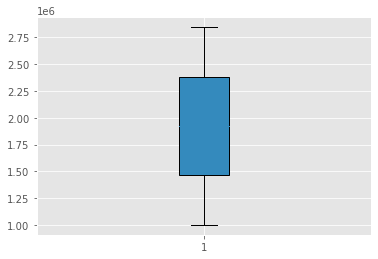

Lower whisker:78223.5
Upper whisker:3767913.5
#####################################
Analysis for column SK_ID_CURR


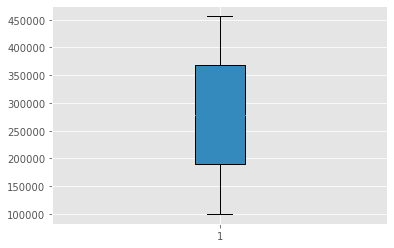

Lower whisker:-77948.5
Upper whisker:634791.5
#####################################
Analysis for column HOUR_APPR_PROCESS_START


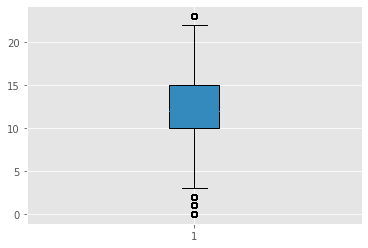

Lower whisker:2.5
Upper whisker:22.5
#####################################
Analysis for column DAYS_DECISION


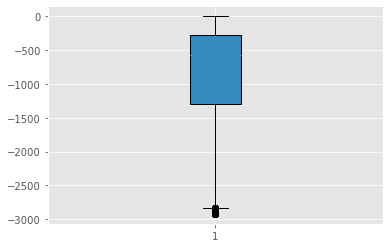

Lower whisker:-2830.0
Upper whisker:1250.0
#####################################
Analysis for column SELLERPLACE_AREA


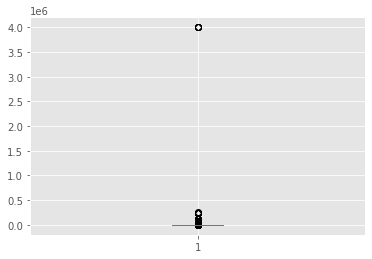

Lower whisker:-125.5
Upper whisker:206.5
#####################################
Analysis for column AMT_ANNUITY


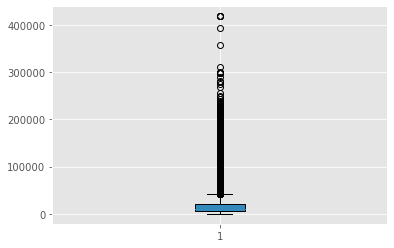

Lower whisker:-15183.18
Upper whisker:42163.38
#####################################
Analysis for column AMT_APPLICATION


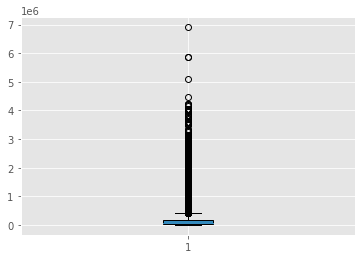

Lower whisker:-223740.0
Upper whisker:422820.0
#####################################
Analysis for column AMT_CREDIT


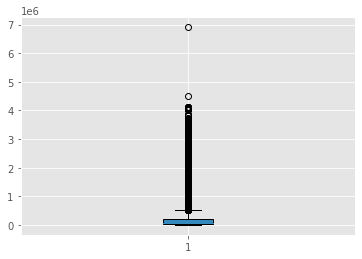

Lower whisker:-264226.5
Upper whisker:504805.5
#####################################
Analysis for column AMT_GOODS_PRICE


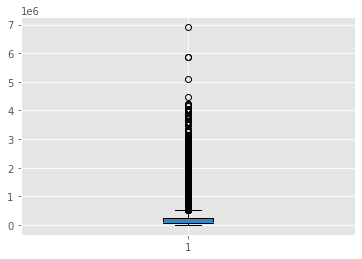

Lower whisker:-223897.5
Upper whisker:508738.5
#####################################
Analysis for column CNT_PAYMENT


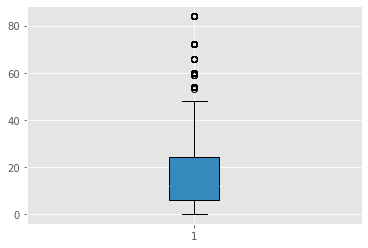

Lower whisker:-21.0
Upper whisker:51.0


In [37]:
#box plot to find outlier of numerical data
print("Plot for all numerical columns, Total col:{}".format(len(all_numerical_df.columns)))


### Numerical column to check outliers
for col in all_numerical_col:
    print("#####################################")
    print("Analysis for column {}".format(col))
    without_null_data = pre_applications[~np.isnan(pre_applications[col])]
    q1 = all_numerical_df[col].quantile(0.25)
    q3 = all_numerical_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - (1.5*iqr)
    upper_wisker = q3 + (1.5*iqr)
    if (lower_whisker>0 or upper_wisker>0):
        plt.boxplot(without_null_data[col], patch_artist = True)
        plt.show()
        print("Lower whisker:{}".format(lower_whisker))
        print("Upper whisker:{}".format(upper_wisker))
    else:
        print("Skipping analysing due to low bounderies value")

## 15. Merging data

In [38]:
# Merge data 
merge_applicant_dataFrame = applications.merge(pre_applications, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
print(merge_applicant_dataFrame.shape)
merge_applicant_dataFrame.describe().apply(lambda col: col.apply('{0:.4f}'.format))
print(merge_applicant_dataFrame.info())

(1413701, 106)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 106 entries, SK_ID_CURR to PRODUCT_COMBINATION
dtypes: category(4), float64(28), int64(10), object(64)
memory usage: 1.1+ GB
None


In [39]:
# print("Length of merge dataset's numerical data set:", len(merge_applicant_dataFrame.select_dtypes(include=["int64","float64"]).columns))
# print("Length of merge dataset's categorical data set:",len(merge_applicant_dataFrame.select_dtypes(include = "object").columns))
merge_applicant_dataFrame['NAME_CONTRACT_STATUS'].value_counts().sort_values(ascending = False)

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

## 16. Analysis on merge data

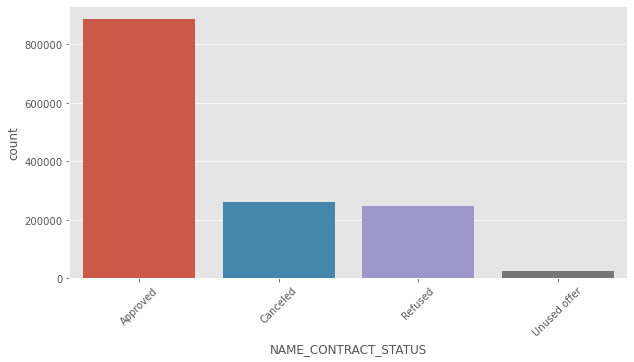

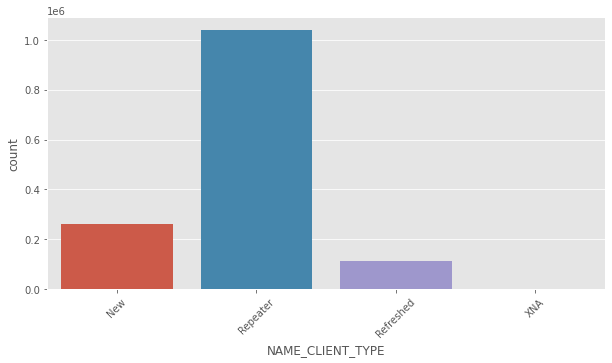

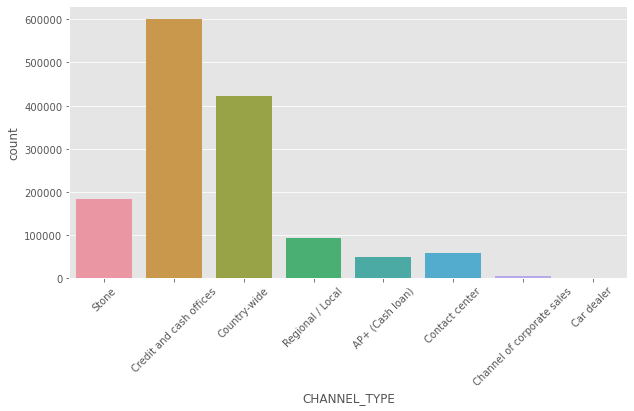

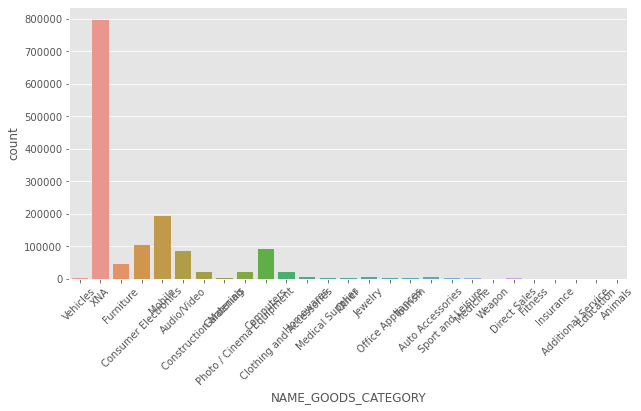

In [40]:
all_cat =["NAME_CONTRACT_STATUS", "NAME_CLIENT_TYPE", "CHANNEL_TYPE","NAME_GOODS_CATEGORY"]
all_categorical_col_df = merge_applicant_dataFrame[all_cat]
all_categorical_col_df.describe()
idx = 0

# count plot
for each in all_categorical_col_df:
    idx+=1
    if each=="ORGANIZATION_TYPE":
        plt.figure(figsize = (15, 5))
    elif (all_categorical_col_df[each].nunique()>3):
        plt.figure(figsize = (10, 5))
    sns.countplot(all_categorical_col_df[each])
    plt.xticks(rotation=45)
    plt.show()


Iqr: 14162.917500000001
Min value: -14986.518750000001
Max value: 41665.15125


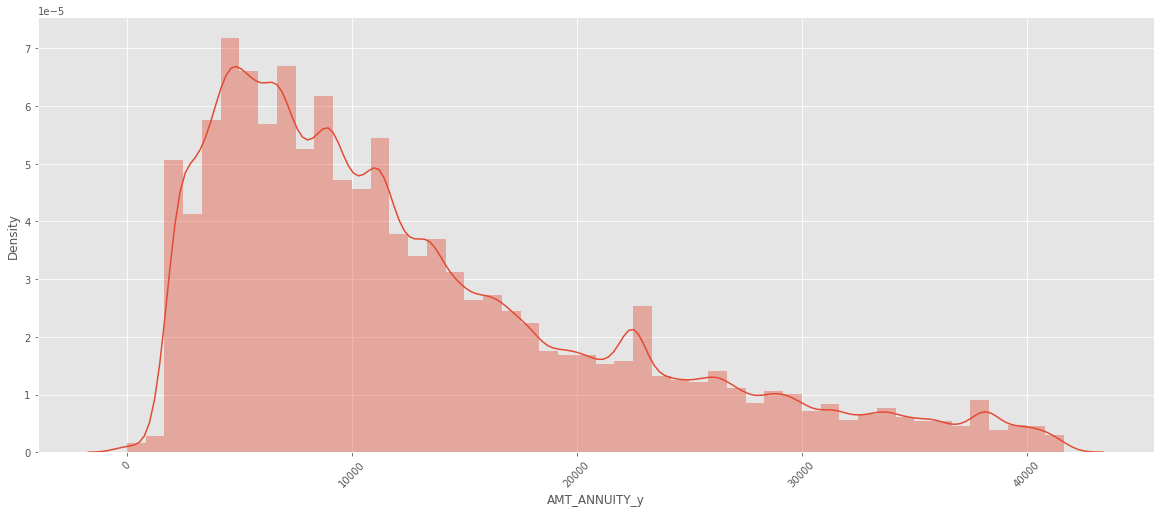

Iqr: 190759.5
Min value: -261258.75
Max value: 501779.25


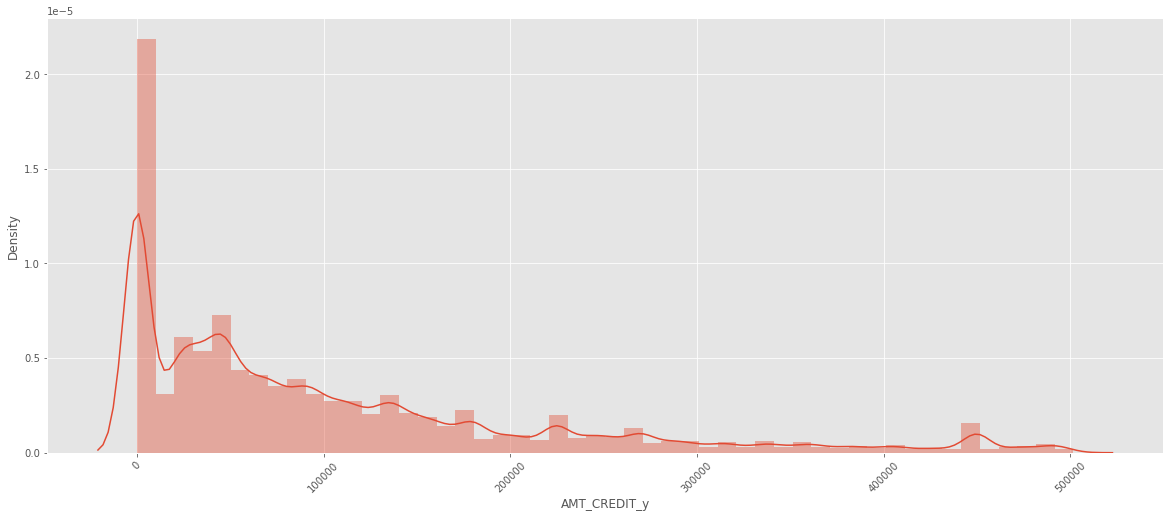

Iqr: 179671.5
Min value: -219678.75
Max value: 499007.25


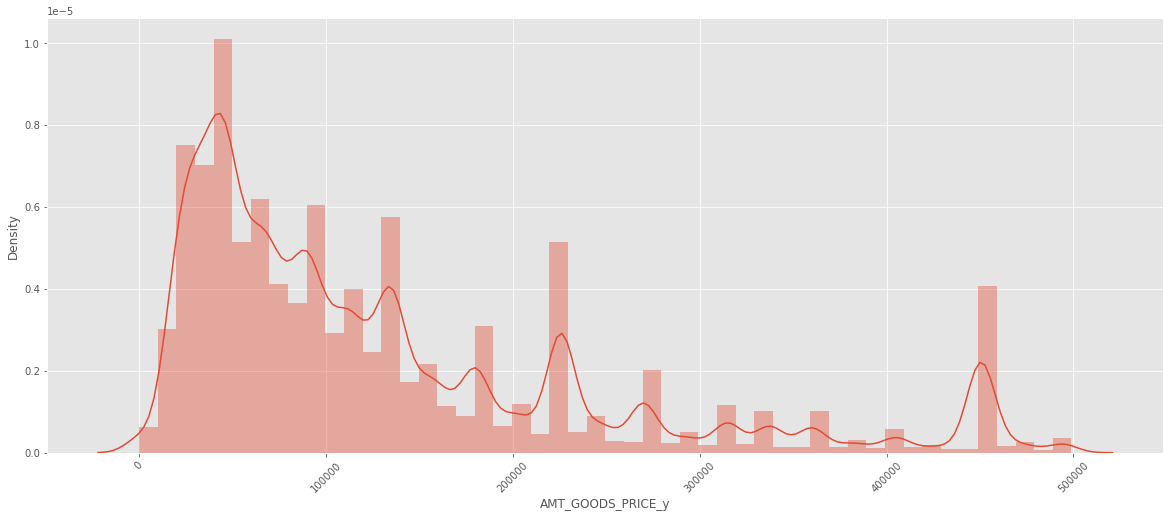

In [41]:
#Univarient analysis

def uniplot_with_distplot(colname):
    q1 = merge_applicant_dataFrame[colname].quantile(0.25)
    q3 = merge_applicant_dataFrame[colname].quantile(0.75)
    iqr = q3-q1
    print("Iqr:", iqr)
    minval = (q1 - 1.5 * iqr)
    maxval = (q3 + 1.5 * iqr)
    print("Min value: {}".format(minval))
    print("Max value: {}".format(maxval))

    #filtering outliers and plotting distplot

    plt.figure(figsize = [20,8])
    sns.distplot(merge_applicant_dataFrame[merge_applicant_dataFrame[colname] <= maxval][colname], hist=True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation = 45)
    plt.show()
    
uniplot_with_distplot("AMT_ANNUITY_y")

uniplot_with_distplot("AMT_CREDIT_y")

uniplot_with_distplot("AMT_GOODS_PRICE_y")

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='Age'>

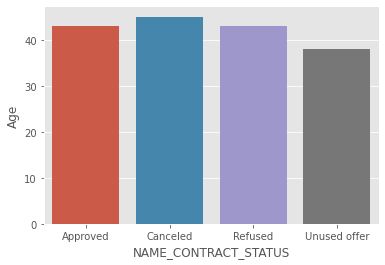

In [42]:
#Bivariate analysis

sns.barplot(merge_applicant_dataFrame["NAME_CONTRACT_STATUS"],merge_applicant_dataFrame["Age"],ci=None,estimator=np.median)


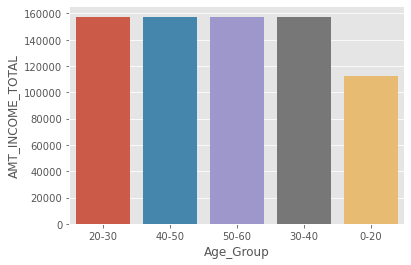

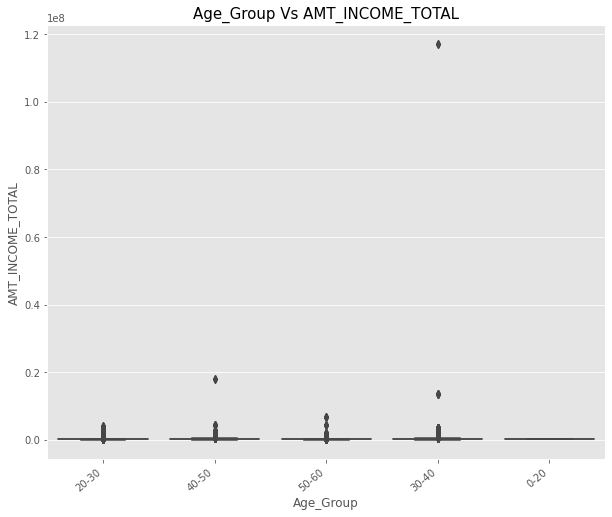

In [43]:
all_numerical_col = merge_applicant_dataFrame.select_dtypes("int64").columns.tolist() + merge_applicant_dataFrame.select_dtypes("float64").columns.tolist()
sns.barplot(merge_applicant_dataFrame["Age_Group"],merge_applicant_dataFrame["AMT_INCOME_TOTAL"],ci=None,estimator=np.median)
#all_numerical_col

bi_variate(merge_applicant_dataFrame, "Age_Group", "AMT_INCOME_TOTAL" )


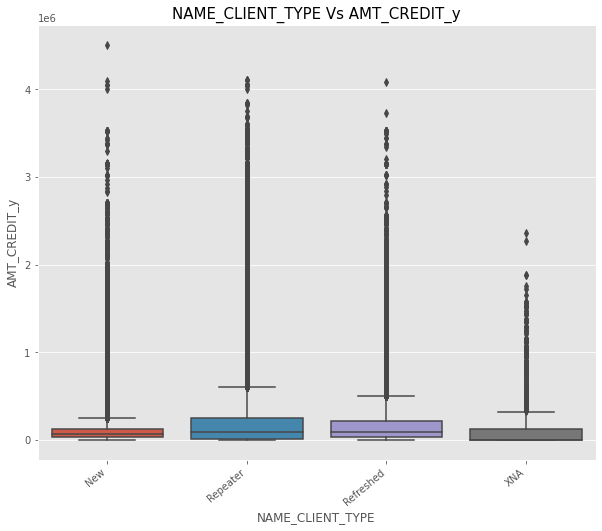

In [44]:
bi_variate(merge_applicant_dataFrame, 'NAME_CLIENT_TYPE','AMT_CREDIT_y')

In [45]:
# sns.pairplot(data = merge_applicant_dataFrame, vars=all_numerical_col)
# plt.show()

print(all_numerical_col)

['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START_x', 'SK_ID_PREV', 'HOUR_APPR_PROCESS_START_y', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age', 'CREDIT_INCOME_RATIO', 'AMT_GOODS_PRICE_Group', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']


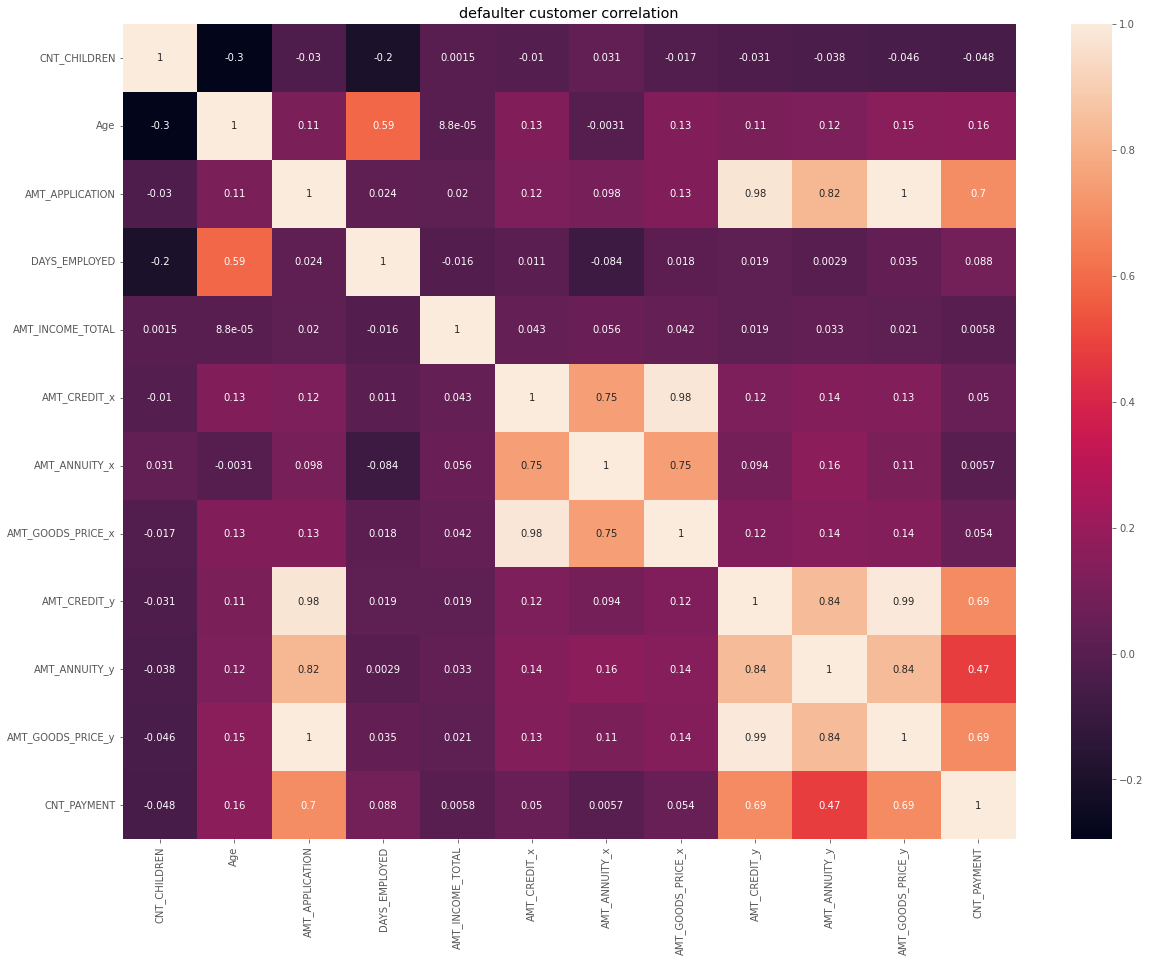

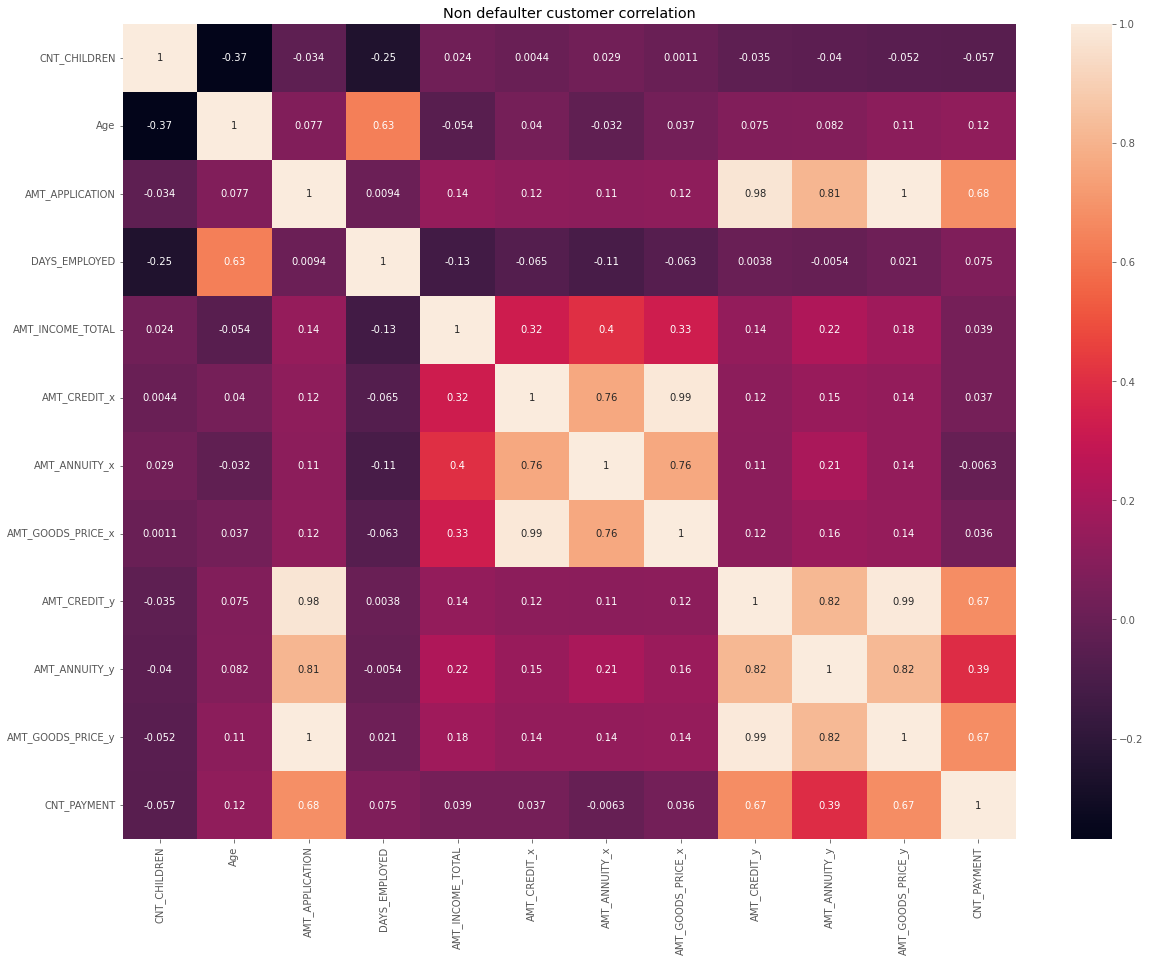

In [46]:
plt.figure(figsize=(20,15))
default_customer = merge_applicant_dataFrame[merge_applicant_dataFrame["TARGET"]==1]
non_default_customer = merge_applicant_dataFrame[merge_applicant_dataFrame["TARGET"]==0]

all_numerical_col=["CNT_CHILDREN", "Age",'AMT_APPLICATION', "DAYS_EMPLOYED",'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x','AMT_CREDIT_y', "AMT_ANNUITY_y",'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']
sns.heatmap(default_customer[all_numerical_col].corr(),annot=True).set(title="defaulter customer correlation")
plt.show()

plt.figure(figsize=(20,15))
all_numerical_col=["CNT_CHILDREN", "Age",'AMT_APPLICATION', "DAYS_EMPLOYED",'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x','AMT_CREDIT_y', "AMT_ANNUITY_y",'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']
sns.heatmap(non_default_customer[all_numerical_col].corr(),annot=True).set(title="Non defaulter customer correlation")
plt.show()